<a href="https://colab.research.google.com/github/PapaKwansa/Chapter-4-submission-mode/blob/main/Analytical_Solution_Strain_L_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Check the function for ec
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C_matrix(x,y,z,a,b,c):
  return np.array([
    [x - a, y - b, z - c],  # Vertex 1
    [x + a, y - b, z - c],  # Vertex 2
    [x + a, y + b, z - c],  # Vertex 3
    [x - a, y + b, z - c],  # Vertex 4
    [x - a, y + b, z + c],  # Vertex 5
    [x - a, y - b, z + c],  # Vertex 6
    [x + a, y - b, z + c],  # Vertex 7
    [x + a, y + b, z + c]   # Vertex 8
])

def R_n(n,C):
  return np.linalg.norm(C[n])


def delta(i,j):  # Change this Kronecker delta.
  return int(i==j)

deltamod = np.array([[0,1,0],[0,0,1],[1,0,0]])

def V0(x,y,z,a,b,c):
  C = C_matrix(x,y,z,a,b,c)
  R_n_list = [R_n(n,C) for n in range(8)]
  result = 0
  for n in range(8):
    for i in range(3):
      result += C[n,i]*C[n,(i+1)%3]*np.log(R_n_list[n]+C[n,(i+2)%3]) - (C[n,i]**2)/2*np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n]))
    result *= ((-1)**(n+1))
  return result

def v10(x,y,z,a,b,c):
   C = C_matrix(x,y,z,a,b,c)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros(3)
   for i in range(3):
    for n in range(8):
        result[i] += ((-1)**(n+1)) * ((C[n,(i+1)%3])*np.log(R_n_list[n]+C[n,(i+2)%3])+C[n,(i+2)%3]*np.log(R_n_list[n]+C[n,(i+1)%3]) - (C[n,i])*np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
   return result

def v20(x,y,z,a,b,c):
   C = C_matrix(x,y,z,a,b,c)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros([3,3])
   for i in range(3):
    for j in range(3):
      for n in range(8):
        result[i,j] += ((-1)**(n+1)) * ((deltamod[i,j] * np.log(C[n, (j+1)%3] + R_n_list[n])) + deltamod[j,i] * np.log(C[n, (i+1)%3] + R_n_list[n]) - delta(i,j) * np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
   return result

def v30(x,y,z,a,b,c):
   C = C_matrix(x,y,z,a,b,c)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros([3,3])
   for i in range(3):
    for j in range(3):
      for n in range(8):
        result[i,j] += ((-1)**(n+1)) * (((deltamod[i,j] * (C[n, 2] + delta(i,0) * R_n_list[n]))/ (R_n_list[n] * (C[n, (i+2)%3] + R_n_list[n]))) + ((deltamod[j,i] * (C[n, 2] + delta(j,0) * R_n_list[n]))/ ((R_n_list[n] * (C[n, (j+2)%3] + R_n_list[n])))) - delta(i,j) * ((C[n, 0] * C[n, 1] *((1 - 2 * delta(i, 2)) * ((R_n_list[n]) ** 2) - (C[n, 2]**2))) / (R_n_list[n] * ((C[n, i] **2) * (R_n_list[n] **2)  + (C[n, (i+ 1)% 3] **2) * ((C[n, (i+ 2)% 3]) **2)))))
   return result


# Define the parameters
#p = 1e6  # Pressure in the inclusion
nu = 0.25 # The Poisson's ratio
E = 10e9  # Young's modulus
alpha =  0.8 # Biot coefficient
h =  2500 # Depth of the inclusion
x = -900 # x-coordinate of the observation point
y = 750 # y-coordinate of the observation point
z = 60 # z-coordinate of the observation point
a = 175
b = 25
c = 125
# Calculate ec seprately and call it for the computation.

def linear_trans(alpha, nu, p, E):
    return ((alpha * (1 - 2 * nu)) * p) / E


def charac_strain(linear_trans):
    return (1 / (4 * np.pi)) * ((1 + nu) / (1 - nu)) * linear_trans


def disp(x,y,z,a,b,c, ec, h):
  result = np.zeros(3)
  V101 = v10(x,y,z-h,a,b,c)
  V102 = v10(x,y,-z-h,a,b,c)
  v201 = v20(x,y,-z-h,a,b,c)
  for i in range(3):
    result[i] = -ec * (V101[i]+ (3 - 4 * nu) * V102[i] - 2 *(1 - 2 * delta(i,2))*z * v201[i,2])
  return result

def disp_prime(x,y,z,a,b,c, ec, h):
  v201 = v20(x,y,z-h,a,b,c)
  v202 = v20(x,y,-z-h,a,b,c)
  v301 = v30(x,y,-z-h,a,b,c)
  result = np.zeros([3,3])
  for i in range(3):
    for j in range(3):
       result[i,j] = -ec * (v201[i,j] + ((3 - 4 * nu) * (1 - 2 * delta(j,2)) - 2 * (1 - 2 * delta(i, 2)) * delta(j,2)) * v202[i,j] + (-2)*(1- 2 * delta(i,2))*(1- 2 * delta(j,2)) * z * v301[i,j])
  return result

def strain(x,y,z,a,b,c, ec, h):
  local_disp_prime = disp_prime(x,y,z,a,b,c, ec, h)
  result = np.zeros([3,3])
  for i in range(3):
    for j in range(3):
      result[i,j] = 0.5 * (local_disp_prime[i,j] + local_disp_prime[j, i])
  return result

#

# Call all the functions for the computation....
def main(x,y,z,a,b,c, nu, h, p):
    # Define the parameters

  E = 10e9  # Young's modulus
  alpha =  0.8 # Biot coefficient

  ec = charac_strain(linear_trans(alpha, nu, p, E))

  # Calculate ec seprately and call it for the computation.
  return strain(x,y,z,a,b,c, ec, h)


def pressure(pmax, tpeak, d, t):
    """
    Calculates the pressure for each day based on the given parameters.

    Parameters:
    - pmax: Maximum pressure value (kPa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - t: Array or list of time values (days).

    Returns:
    - Array of calculated pressure values corresponding to the time values.
    """
    t = np.array(t)  # Ensure time is a NumPy array for vectorized operations

    # Initialize pressure array
    p = np.zeros_like(t, dtype=float)

    # Apply conditions for pressure calculations
    condition_1 = t <= tpeak
    condition_2 = t > tpeak

    # Calculate pressure based on conditions
    p[condition_1] = (pmax / tpeak) * t[condition_1]
    p[condition_2] = pmax * np.exp(-d * (t[condition_2] / tpeak - 1))

    return p


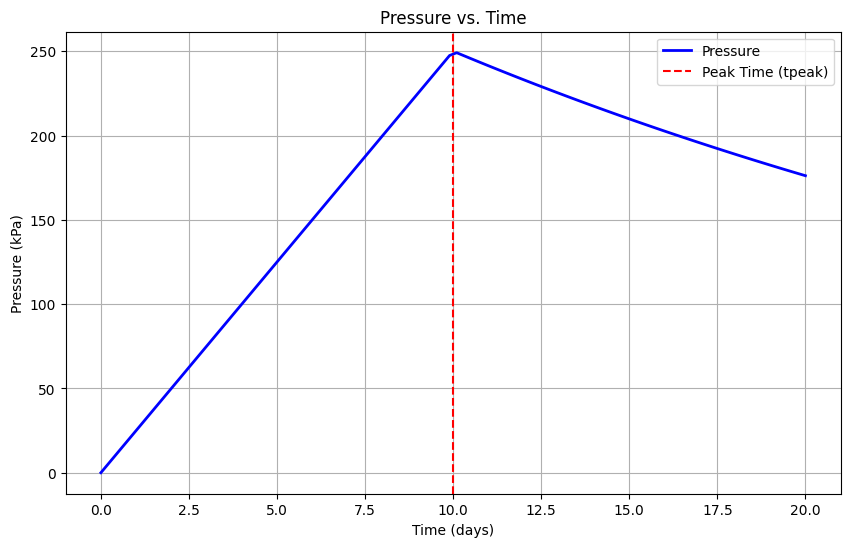

In [24]:
# Test p to see if it returns the right values
# Example parameters
pmax = 250  # Maximum pressure (kPa)
tpeak = 10  # Time to peak pressure (days)
d = 0.35  # Decay rate
time = np.linspace(0, 20, 100)  # Time array from 0 to 20 days, with 100 points

# Compute pressure
pressure_values = pressure(pmax, tpeak, d, time)

# Plotting the pressure values
plt.figure(figsize=(10, 6))
plt.plot(time, pressure_values, label='Pressure', color='blue', linewidth=2)
plt.axvline(x=tpeak, color='red', linestyle='--', label='Peak Time (tpeak)')
plt.xlabel('Time (days)')
plt.ylabel('Pressure (kPa)')
plt.title('Pressure vs. Time')
plt.legend()
plt.grid(True)
plt.show()



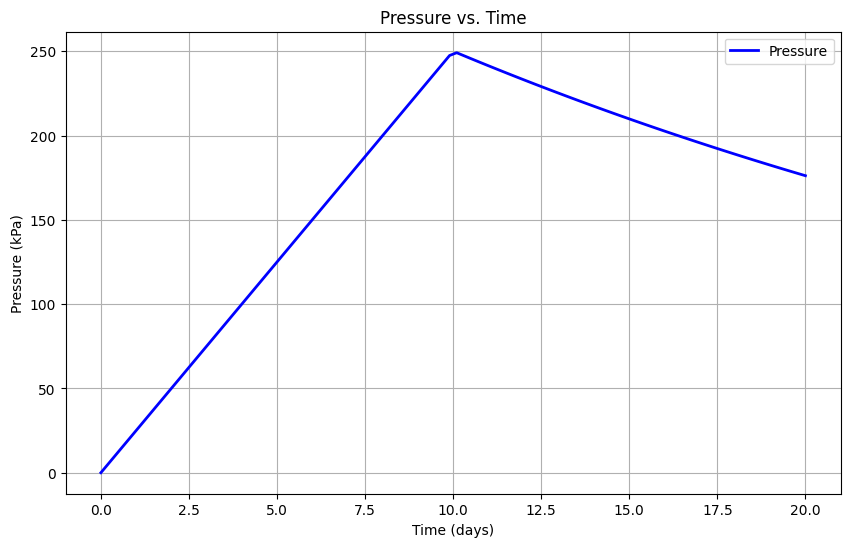

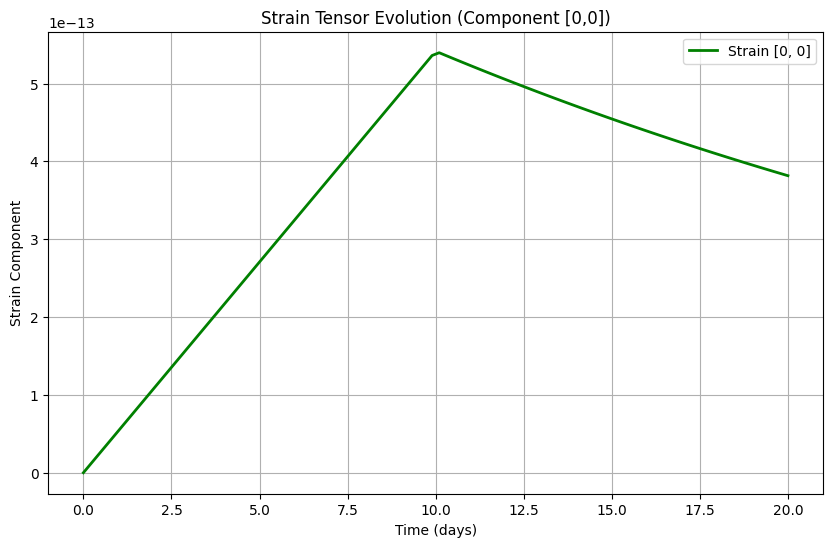

In [25]:
# Generate the time series pressure dataset based on the analytical solution.
import numpy as np
import matplotlib.pyplot as plt

def strain_time_series(pmax, tpeak, d, t, x, y, z, a, b, c, nu, h):
    """
    Computes a time series dataset of strain tensors based on pressure over time.

    Parameters:
    - pmax: Maximum pressure value (kPa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - t: Array or list of time values (days).
    - x, y, z: Coordinates of the observation point.
    - a, b, c: Geometry parameters of the inclusion.
    - nu: Poisson's ratio.
    - h: Depth of the inclusion.

    Returns:
    - strain_dataset: A list of strain tensors for each time step.
    """
    # Calculate pressure values for the given time array
    pressure_values = pressure(pmax, tpeak, d, t)

    # Initialize an empty list to store the strain tensors
    strain_dataset = []

    # Loop through each pressure value and calculate the corresponding strain tensor
    for p in pressure_values:
        # Compute the characteristic strain
        ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=p, E=10e9))

        # Calculate the strain tensor for the current pressure
        strain_tensor = strain(x, y, z, a, b, c, ec, h)

        # Append the strain tensor to the dataset
        strain_dataset.append(strain_tensor)

    return strain_dataset

# Example Parameters
pmax = 250  # Maximum pressure (kPa)
tpeak = 10  # Time to peak pressure (days)
d = 0.35  # Decay rate
time = np.linspace(0, 20, 100)  # Time array from 0 to 20 days

x, y, z = -900, 750, 60
a, b, c = 175, 25, 125
nu, h = 0.25, 2500

# Compute the strain time series dataset
strain_data = strain_time_series(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h)

# Example: Plot pressure over time
pressure_values = pressure(pmax, tpeak, d, time)
plt.figure(figsize=(10, 6))
plt.plot(time, pressure_values, label='Pressure', color='blue', linewidth=2)
plt.xlabel("Time (days)")
plt.ylabel("Pressure (kPa)")
plt.title("Pressure vs. Time")
plt.legend()
plt.grid(True)
plt.show()

# Example: Visualize strain tensor evolution (component [0, 0] as an example)
strain_component = [strain[0, 0] for strain in strain_data]  # Extracting one component for simplicity
plt.figure(figsize=(10, 6))
plt.plot(time, strain_component, label='Strain [0, 0]', color='green', linewidth=2)
plt.xlabel("Time (days)")
plt.ylabel("Strain Component")
plt.title("Strain Tensor Evolution (Component [0,0])")
plt.legend()
plt.grid(True)
plt.show()


    Time (days)  Pressure (kPa)    Epsilon_NW    Epsilon_EW  Epsilon_Vertical  \
0      0.000000        0.000000  0.000000e+00  0.000000e+00     -0.000000e+00   
1      0.202020        5.050505  1.093900e-14  1.243504e-14     -7.811751e-15   
2      0.404040       10.101010  2.187800e-14  2.487008e-14     -1.562350e-14   
3      0.606061       15.151515  3.281699e-14  3.730513e-14     -2.343525e-14   
4      0.808081       20.202020  4.375599e-14  4.974017e-14     -3.124700e-14   
..          ...             ...           ...           ...               ...   
95    19.191919      181.225796  3.925209e-13  4.462030e-13     -2.803068e-13   
96    19.393939      179.948921  3.897552e-13  4.430591e-13     -2.783318e-13   
97    19.595960      178.681043  3.870091e-13  4.399375e-13     -2.763707e-13   
98    19.797980      177.422097  3.842823e-13  4.368378e-13     -2.744235e-13   
99    20.000000      176.172022  3.815748e-13  4.337599e-13     -2.724900e-13   

    Epsilon_Shear  
0    0.

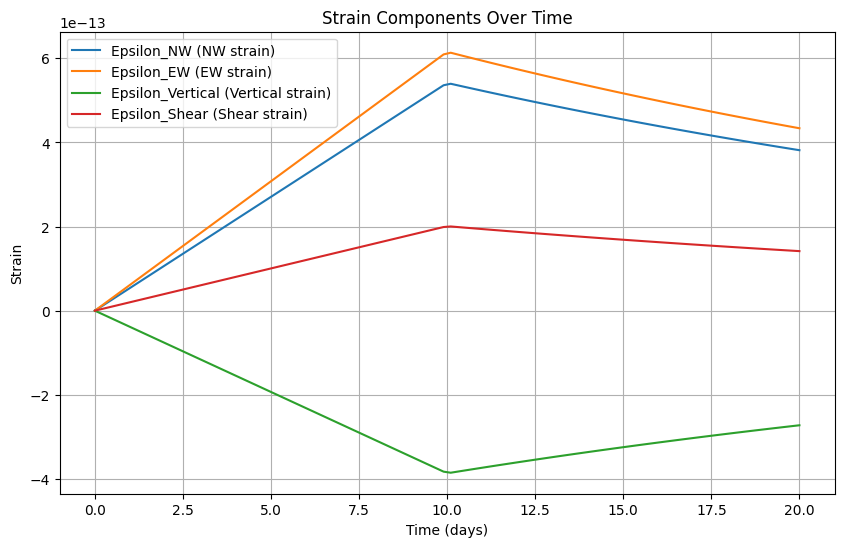

In [26]:
import pandas as pd
import numpy as np

# Function for time series strain dataset
def strain_dataset(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h):
    """
    Generates a dataset of strain tensor components and pressure over time.

    Parameters:
    - pmax: Maximum pressure (kPa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - time: Array of time values (days).
    - x, y, z: Coordinates of the observation point.
    - a, b, c: Geometry parameters of the inclusion.
    - nu: Poisson's ratio.
    - h: Depth of the inclusion.

    Returns:
    - DataFrame containing pressure, strain components for each time step.
    """
    # Calculate pressure over time
    pressure_values = pressure(pmax, tpeak, d, time)

    # Initialize lists to store strain components
    epsilon_nw = []
    epsilon_ew = []
    epsilon_vertical = []
    epsilon_shear = []

    for p in pressure_values:
        # Compute characteristic strain
        ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=p, E=10e9))

        # Compute the strain tensor
        strain_tensor = strain(x, y, z, a, b, c, ec, h)

        # Extract components
        epsilon_nw.append(strain_tensor[0, 0])       # North-West strain
        epsilon_ew.append(strain_tensor[1, 1])       # East-West strain
        epsilon_vertical.append(strain_tensor[2, 2]) # Vertical strain
        epsilon_shear.append(strain_tensor[0, 1])    # Shear strain (xy component)

    # Create the dataset as a DataFrame
    dataset = pd.DataFrame({
        "Time (days)": time,
        "Pressure (kPa)": pressure_values,
        "Epsilon_NW": epsilon_nw,
        "Epsilon_EW": epsilon_ew,
        "Epsilon_Vertical": epsilon_vertical,
        "Epsilon_Shear": epsilon_shear
    })

    return dataset

# Example parameters
pmax = 250  # Maximum pressure (kPa)
tpeak = 10  # Time to peak pressure (days)
d = 0.35  # Decay rate
time = np.linspace(0, 20, 100)  # Time array from 0 to 20 days

x, y, z = -900, 750, 60  # Coordinates
a, b, c = 175, 25, 125  # Geometry
nu, h = 0.25, 2500  # Material and depth properties

# Generate the dataset
dataset = strain_dataset(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h)

# Display the dataset
print(dataset)

# Optionally, save the dataset to a CSV file
dataset.to_csv("strain_pressure_dataset.csv", index=False)

# Plot the strain components over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataset["Time (days)"], dataset["Epsilon_NW"], label="Epsilon_NW (NW strain)")
plt.plot(dataset["Time (days)"], dataset["Epsilon_EW"], label="Epsilon_EW (EW strain)")
plt.plot(dataset["Time (days)"], dataset["Epsilon_Vertical"], label="Epsilon_Vertical (Vertical strain)")
plt.plot(dataset["Time (days)"], dataset["Epsilon_Shear"], label="Epsilon_Shear (Shear strain)")
plt.xlabel("Time (days)")
plt.ylabel("Strain")
plt.title("Strain Components Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
# Define the forward model.
import numpy as np
import pandas as pd

def forward_model(params, time, x, y, z, nu, h, pmax, tpeak, d):
    """
    Forward model to compute strain tensor components given parameters.
    """
    a, b, c, E = params  # Parameters to estimate
    pressure_values = pressure(pmax, tpeak, d, time)

    epsilon_nw = []
    epsilon_ew = []
    epsilon_vertical = []
    epsilon_shear = []

    for p in pressure_values:
        ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=p, E=E))
        strain_tensor = strain(x, y, z, a, b, c, ec, h)

        epsilon_nw.append(strain_tensor[0, 0])
        epsilon_ew.append(strain_tensor[1, 1])
        epsilon_vertical.append(strain_tensor[2, 2])
        epsilon_shear.append(strain_tensor[0, 1])

    return np.array([epsilon_nw, epsilon_ew, epsilon_vertical, epsilon_shear])

In [45]:
# Define the likelihood function.
def likelihood(params, observed_data, time, x, y, z, nu, h, pmax, tpeak, d):
    """
    Likelihood function to compare observed and predicted strain data.
    """
    predicted_data = forward_model(params, time, x, y, z, nu, h, pmax, tpeak, d)
    residuals = observed_data - predicted_data
    sigma = 1e-6  # Assumed noise level in the data
    return -0.5 * np.sum((residuals / sigma) ** 2)

In [47]:
# Define the parameter priors
from pydream.parameters import SampledParam  # Updated import
from scipy.stats import uniform

# Define parameter priors
param_priors = [
    SampledParam(uniform, loc=100, scale=200),  # Prior for a (e.g., 100 to 300)
    SampledParam(uniform, loc=10, scale=50),    # Prior for b (e.g., 10 to 60)
    SampledParam(uniform, loc=50, scale=200),   # Prior for c (e.g., 50 to 250)
    SampledParam(uniform, loc=1e9, scale=5e9)   # Prior for E (e.g., 1e9 to 6e9)
]

In [ ]:
# Run the DREAM algorithm.
from pydream.core import run_dream

# Observed strain data (replace with your actual dataset)
observed_data = np.array([
    dataset["Epsilon_NW"].values,
    dataset["Epsilon_EW"].values,
    dataset["Epsilon_Vertical"].values,
    dataset["Epsilon_Shear"].values
])

# Define the likelihood function as a separate named function
def likelihood_function(params):
    """Likelihood function to compare observed and predicted strain data."""
    return likelihood(params, observed_data, time, x, y, z, nu, h, pmax, tpeak, d)

# Run the DREAM algorithm
sampled_params, logps = run_dream(
    parameters=param_priors,
    likelihood=likelihood_function,  # Pass the named function instead of the lambda
    niterations=10000,  # Number of iterations
    nchains=4,          # Number of chains
    save_history=True,
    model_name='strain_inversion'
)

# Save the results
np.save('strain_inversion_sampled_params.npy', sampled_params)
np.save('strain_inversion_logps.npy', logps)

Streaming output truncated to the last 5000 lines.
Accepted point.  New logp:  -36.84136148872794  old logp:  -36.84136148846039 Accepted point.  New logp:   at temperature: -36.84136148792426  1.0 old logp: 
 Accepted point.  New logp: -36.84136148905921   at temperature:  -36.841361488763131.0 
 old logp:  -36.841361488123724  at temperature:  1.0
Accepted point.  New logp:  -36.84136148795934  old logp:  -36.84136148798232  at temperature:  1.0
Accepted point.  New logp:  -36.8413614884036  old logp:  -36.84136148872794  at temperature:  1.0
Accepted point.  New logp:  Accepted point.  New logp: -36.84136148804182 -36.84136148794956  old logp:    old logp: -36.84136148792426 -36.84136148876313   at temperature:  at temperature:   1.0
1.0
Accepted point.  New logp:  -36.84136148928519  old logp:  -36.84136148795934  at temperature:  1.0
Accepted point.  New logp:  -36.84136148811682  old logp:  -36.8413614884036  at temperature:  1.0
Accepted point.  New logp:  -36.8413614879153  old

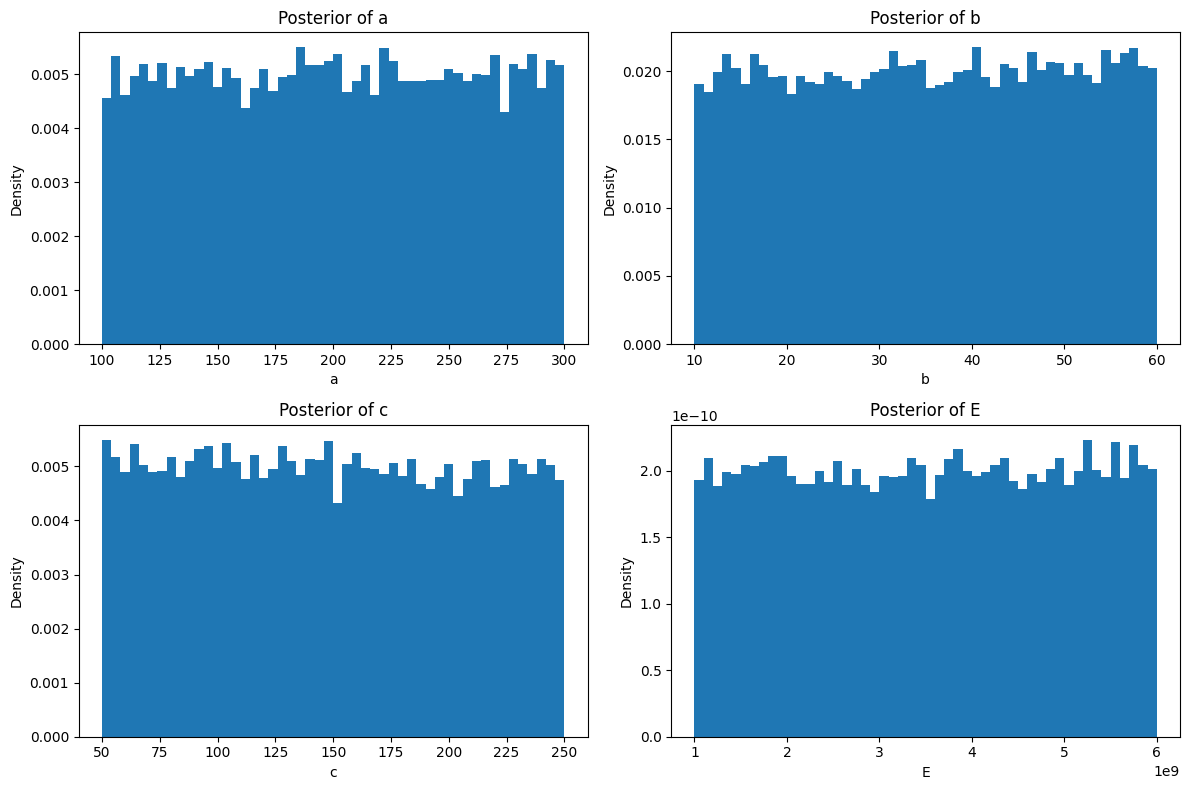

In [50]:
# Analyze the results.
import numpy as np
import matplotlib.pyplot as plt

# Load the sampled parameters
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Flatten the chains for analysis
flat_samples = np.concatenate(sampled_params, axis=0)

# Plot histograms of the posterior distributions
param_names = ['a', 'b', 'c', 'E']
plt.figure(figsize=(12, 8))
for i, param_name in enumerate(param_names):
    plt.subplot(2, 2, i + 1)
    plt.hist(flat_samples[:, i], bins=50, density=True)
    plt.title(f'Posterior of {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
# Flatten the sampled parameters
flat_samples = np.concatenate(sampled_params, axis=0)
estimated_values = np.median(flat_samples, axis=0)
print(f"Estimated values: {estimated_values}")


In [27]:
from google.colab import files
files.download("strain_pressure_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import pandas as pd

# Load your strain tensor data into a pandas dataframe
data = pd.read_csv('strain_pressure_dataset.csv')  # Replace 'your_data.csv' with the file path


In [29]:
!pip install git+https://github.com/LoLab-VU/PyDREAM.git


  Cloning https://github.com/LoLab-VU/PyDREAM.git to /tmp/pip-req-build-4rlybjn1
  Running command git clone --filter=blob:none --quiet https://github.com/LoLab-VU/PyDREAM.git /tmp/pip-req-build-4rlybjn1
  Resolved https://github.com/LoLab-VU/PyDREAM.git to commit 9beedddd511361abe6390e51f9d749a10d9392b7
  Preparing metadata (setup.py) ... done


In [30]:
!pip show pydream

Name: pydream
Version: 2.0.0
Summary: A Python implementation of the MT-DREAM(ZS) algorithm from Laloy and Vrugt 2012.
Home-page: https://github.com/LoLab-VU/PyDREAM
Author: Erin Shockley
Author-email: erin.shockley@vanderbilt.edu
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, scipy
Required-by: 


In [31]:
!pip show pydream
!pip freeze


Name: pydream
Version: 2.0.0
Summary: A Python implementation of the MT-DREAM(ZS) algorithm from Laloy and Vrugt 2012.
Home-page: https://github.com/LoLab-VU/PyDREAM
Author: Erin Shockley
Author-email: erin.shockley@vanderbilt.edu
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, scipy
Required-by: 
absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blosc2==3.2.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl=

In [32]:
import pydream

In [33]:
from pydream import Dream

In [34]:
lower_bounds = [1e6, 0.1]  # Young's modulus and Poisson's ratio ranges
upper_bounds = [1e10, 0.5]


In [35]:
def objective_function(params):
    youngs_modulus, poisson_ratio = params
    return some_error_metric(youngs_modulus, poisson_ratio)


In [36]:
print(dir(pydream))

['Dream', 'Dream_shared_vars', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'core', 'model', 'parameters']


In [37]:
import unittest
from os import remove

import multiprocessing as mp
import numpy as np
import pydream.Dream_shared_vars
from pydream.Dream import Dream
from pydream.core import run_dream, _setup_mp_dream_pool, _sample_dream, _sample_dream_pt, _sample_dream_pt_chain
from pydream.model import Model
#from pydream.tests.test_models import onedmodel, multidmodel, multidmodel_uniform


In [38]:
import pydream.core as core
print(dir(core))

['Dream', 'DreamPool', 'Dream_shared_vars', 'Model', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mp_dream_init', '_sample_dream', '_sample_dream_pt', '_sample_dream_pt_chain', '_setup_mp_dream_pool', 'mp', 'np', 'run_dream', 'traceback']


In [39]:
# Define my own probablity distribution function.
#Parameters defined for simple example statistical models for testing DREAM


from pydream.parameters import SampledParam
from scipy.stats import norm, uniform
import numpy as np

def onedmodel():
    """One dimensional model with normal prior."""

    mu = -2
    sd = 3
    x = SampledParam(norm, loc=mu, scale=sd)
    like = simple_likelihood

    return [x], like

def multidmodel():
    """Multidimensional model with normal prior."""

    mu = np.array([-6.6, 3, 1.0, -.12])
    sd = np.array([.13, 5, .9, 1.0])

    x = SampledParam(norm, loc=mu, scale=sd)
    like = simple_likelihood

    return [x], like

def multidmodel_uniform():
    """Multidimensional model with uniform priors."""

    lower = np.array([-5, -9, 5, 3])
    upper = np.array([10, 2, 7, 8])
    range = upper-lower

    x = SampledParam(uniform, loc=lower, scale=range)
    like =simple_likelihood

    return [x], like

def simple_likelihood(param):
    """Flat likelihood."""

    return np.sum(param + 3)

In [40]:
# Distribution function continued.

import numpy as np

class UniformModel:
    """
    A model with uniform priors for parameters.
    """

    def __init__(self, lower_bounds, upper_bounds):
        self.lower_bounds = lower_bounds
        self.upper_bounds = upper_bounds
        self.sampled_parameters = [
            {'name': 'param_1', 'lower_bound': lower_bounds[0], 'upper_bound': upper_bounds[0]},
            {'name': 'param_2', 'lower_bound': lower_bounds[1], 'upper_bound': upper_bounds[1]}
        ]

    def total_logp(self, params):
        """
        Calculates the total log-probability (prior + likelihood).
        """
        prior = 0
        for i, param in enumerate(params):
            if self.lower_bounds[i] <= param <= self.upper_bounds[i]:
                prior += 0  # Uniform prior (log(1) = 0)
            else:
                prior = -np.inf  # Parameter outside bounds
                break  # No need to continue if one parameter is out of bounds

        # Likelihood (example: assuming a simple Gaussian likelihood)
        # likelihood = -0.5 * np.sum((params - [5e8, 0.3])**2 / [1e16, 0.01])
        # Using a flat likelihood (to be modified later)
        likelihood = 0  # This is an arbitrary value

        return prior, likelihood


def onedmodel(params):
    """
    Example 1D model function.
    """
    return params[0]

def multidmodel(params):
    """
    Example multi-dimensional model function.
    """
    return np.sum(params)

def multidmodel_uniform(params):
    """
    Example multi-dimensional model function with uniform priors.
    """
    return np.sum(params)

In [41]:
# Probability distribution for the different priors(normal and uniform distribution)
# Had to define my own probability distribution function classes.
import numbers
import sys

class Test_Dream_Initialization(unittest.TestCase):

    def test_fail_with_one_chain(self):
        """Test that DREAM fails if run with only one chain."""
        self.param, self.like = onedmodel()
        assertRaisesRegex = self.assertRaisesRegexp if sys.version_info[0] < 3 else self.assertRaisesRegex
        assertRaisesRegex(Exception, 'Dream should be run with at least ', run_dream, self.param, self.like, nchains=1)

    def test_total_var_dimension_init(self):
        """Test that DREAM correctly identifies the total number of dimensions in all sampled parameters for a few test cases."""
        self.param, self.like = onedmodel()
        model = Model(likelihood=self.like, sampled_parameters=self.param)
        step = Dream(model=model, variables=self.param)
        self.assertEqual(step.total_var_dimension, 1)

        self.param, self.like = multidmodel()
        model = Model(likelihood=self.like, sampled_parameters=self.param)
        step = Dream(model=model, variables=self.param)
        self.assertEqual(step.total_var_dimension, 4)

class Test_Dream_Algorithm_Components(unittest.TestCase):

    def test_gamma_unityfraction(self):
        """Test that gamma value is set to 1 the fraction of times indicated by the p_gamma_unity DREAM parameter."""
        self.param, self.like = onedmodel()
        n_unity_choices = 0
        model = Model(likelihood=self.like, sampled_parameters=self.param)
        step = Dream(model=model)
        fraction = step.p_gamma_unity
        for iteration in range(10000):
           choice = step.set_gamma(DEpairs=1, snooker_choice=False, gamma_level_choice=1, d_prime=step.total_var_dimension)
           if choice == 1:
               n_unity_choices += 1
        emp_frac = n_unity_choices/10000.0
        self.assertAlmostEqual(emp_frac, fraction, places=1)

1. Understand Your Inversion Problem
Clearly define the inversion problem: What are the parameters you want to estimate? What is the forward model that relates the parameters to the observed data? What is the likelihood function?
Ensure you have a forward model and a likelihood function that can evaluate the fit between the observed data and the model predictions.

2. Modify or Create a Model
Replace the test models (onedmodel, multidmodel, etc.) with your own model that represents the inversion problem.
Define the likelihood function for your problem. This function should compute the probability of the observed data given the model parameters.

In [42]:
# The solution steps.
import numpy as np

def forward_model(params):
    """
    Define your forward model here.
    Example: A simple linear model y = mx + c
    """
    x = np.linspace(0, 10, 100)  # Example independent variable
    m, c = params  # Example parameters
    return m * x + c

def likelihood(params, observed_data):
    """
    Define the likelihood function for your inversion problem.
    Example: Gaussian likelihood
    """
    model_predictions = forward_model(params)
    residuals = observed_data - model_predictions
    sigma = 1.0  # Standard deviation of noise
    return -0.5 * np.sum((residuals / sigma) ** 2)

In [43]:
# Define the parameter space.
from pydream.model import SampledParam
from scipy.stats import uniform

# Define parameter priors
param_priors = [
    SampledParam(uniform, loc=0, scale=10),  # Prior for parameter m
    SampledParam(uniform, loc=-5, scale=10)  # Prior for parameter c
]

ImportError: cannot import name 'SampledParam' from 'pydream.model' (/usr/local/lib/python3.11/dist-packages/pydream/model.py)

In [ ]:
# Configure the DREAM algorithm for the inversion.
from pydream.core import run_dream
from inversion_model import param_priors, likelihood
import numpy as np

# Observed data for the inversion problem
observed_data = np.linspace(0, 10, 100) + np.random.normal(0, 1, 100)  # Example noisy data

# Run the DREAM algorithm
sampled_params, logps = run_dream(
    parameters=param_priors,
    likelihood=lambda params: likelihood(params, observed_data),
    niterations=10000,  # Number of iterations
    nchains=4,          # Number of chains
    save_history=True,
    model_name='inversion_model'
)

# Save the results
np.save('inversion_model_sampled_params.npy', sampled_params)
np.save('inversion_model_logps.npy', logps)

In [ ]:
# Analyze the results
import numpy as np
import matplotlib.pyplot as plt

# Load the sampled parameters
sampled_params = np.load('inversion_model_sampled_params.npy', allow_pickle=True)

# Flatten the chains for analysis
flat_samples = np.concatenate(sampled_params, axis=0)

# Plot histograms of the posterior distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(flat_samples[:, 0], bins=50, density=True)
plt.title('Posterior of Parameter m')
plt.xlabel('m')

plt.subplot(1, 2, 2)
plt.hist(flat_samples[:, 1], bins=50, density=True)
plt.title('Posterior of Parameter c')
plt.xlabel('c')

plt.tight_layout()
plt.show()

In [ ]:
# Automate testing.
import unittest
from inversion_model import forward_model, likelihood
import numpy as np

class TestInversionModel(unittest.TestCase):
    def test_forward_model(self):
        params = [2, 1]
        predictions = forward_model(params)
        self.assertEqual(len(predictions), 100)
        self.assertAlmostEqual(predictions[0], 1)
        self.assertAlmostEqual(predictions[-1], 21)

    def test_likelihood(self):
        params = [2, 1]
        observed_data = np.linspace(0, 10, 100) + np.random.normal(0, 1, 100)
        logp = likelihood(params, observed_data)
        self.assertTrue(isinstance(logp, float))

if __name__ == '__main__':
    unittest.main()

Summary of Steps
Define your forward model and likelihood function.
Specify the parameter space and priors.
Configure and run the DREAM algorithm.
Analyze the results to infer posterior distributions.
Validate the results using synthetic or real data.
Add unit tests to ensure correctness.
By following these steps, you can adapt the provided code to solve your inversion problem

In [ ]:
# Running the function call above
if __name__ == '__main__':
    unittest.main()

$ω x^4$

In [ ]:
sampled_params, likelihood = onedmodel()
print("Sampled parameters:", sampled_params)
print("Likelihood function output:", likelihood([-1]))


In [ ]:
from pydream.tests.test_models import onedmodel, multidmodel, multidmodel_uniform

In [ ]:
from pydream.core import Dream # Import the Dream class
from pydream.model import UniformModel  # Import a model class

# Create a model object (example using UniformModel)
model = UniformModel(lower_bounds, upper_bounds)

sampler = Dream(model=Model, # Pass the model object to Dream
                dim=2,
                lower_bounds=lower_bounds,
                upper_bounds=upper_bounds,
                obj_fun=objective_function,
                n_iterations=1000,
                n_chains=10,
                n_burnin=200,
                adaptive_sampling=True)

# Run the sampler
sampler.sample()

In [ ]:
from pydream.core import Dream # Import the Dream class

sampler = Dream(dim=2,
                lower_bounds=lower_bounds,
                upper_bounds=upper_bounds,
                obj_fun=objective_function,
                n_iterations=1000,
                n_chains=10,
                n_burnin=200,
                adaptive_sampling=True)

# Run the sampler
sampler.sample()

In [ ]:
def model_function(params, time, pressure):
    # Example model: Simple linear relation between pressure and strain components.
    # You can modify this model depending on your system's characteristics.
    youngs_modulus = params[0]
    poisson_ratio = params[1]

    # Example calculations for strain components
    epsilon_NW = (pressure / youngs_modulus) * (1 - poisson_ratio)
    epsilon_EW = (pressure / youngs_modulus) * (1 - poisson_ratio)
    epsilon_vertical = (pressure / youngs_modulus) * (1 - poisson_ratio)
    epsilon_shear = (pressure / youngs_modulus) * (1 - poisson_ratio)

    return epsilon_NW, epsilon_EW, epsilon_vertical, epsilon_shear


In [ ]:
from pyDREAMz import DREAMz

# Define bounds for the parameters: [Young's Modulus, Poisson's Ratio]
lower_bounds = [1e6, 0.1]  # Example: Young's modulus in Pascals, Poisson's ratio between 0 and 0.5
upper_bounds = [1e10, 0.5]

# Define your objective function (misfit function)
def objective_function(params):
    youngs_modulus = params[0]
    poisson_ratio = params[1]

    # Predict strain components using the model function
    predicted_NW, predicted_EW, predicted_vertical, predicted_shear = model_function(
        params, data['Time'], data['Pressure'])

    # Calculate the misfit: sum of squared differences between observed and predicted strain components
    epsilon_NW_diff = (data['Epsilon_NW'] - predicted_NW)**2
    epsilon_EW_diff = (data['Epsilon_EW'] - predicted_EW)**2
    epsilon_vertical_diff = (data['Epsilon_Vertical'] - predicted_vertical)**2
    epsilon_shear_diff = (data['Epsilon_Shear'] - predicted_shear)**2

    # Total misfit
    misfit = sum(epsilon_NW_diff + epsilon_EW_diff + epsilon_vertical_diff + epsilon_shear_diff)

    return misfit

# Initialize the DREAMz MCMC sampler
sampler = DREAMz.DREAMz(dim=2,  # Number of parameters: Young's modulus and Poisson's ratio
                        lower_bounds=lower_bounds,
                        upper_bounds=upper_bounds,
                        obj_fun=objective_function,
                        n_iterations=1000,  # Number of MCMC iterations
                        n_chains=10,  # Number of chains
                        n_burnin=200,  # Burn-in period
                        adaptive_sampling=True)

# Run the sampler
sampler.sample()


In [ ]:
import matplotlib.pyplot as plt

# Plot the trace of the parameter estimates
sampler.plot_trace()

# Plot the posterior distributions of the parameters
sampler.plot_posterior()

# Extract the best parameter values
best_params = sampler.get_best_parameters()
print("Best Parameters: ", best_params)


In [ ]:
from multiprocessing import Pool, TimeoutError
import time
import os

def f(x):
    return x*x

if __name__ == '__main__':
    # start 4 worker processes
    with Pool(processes=4) as pool:

        # print "[0, 1, 4,..., 81]"
        print(pool.map(f, range(10)))

        # print same numbers in arbitrary order
        for i in pool.imap_unordered(f, range(10)):
            print(i)

        # evaluate "f(20)" asynchronously
        res = pool.apply_async(f, (20,))      # runs in *only* one process
        print(res.get(timeout=1))             # prints "400"

        # evaluate "os.getpid()" asynchronously
        res = pool.apply_async(os.getpid, ()) # runs in *only* one process
        print(res.get(timeout=1))             # prints the PID of that process

        # launching multiple evaluations asynchronously *may* use more processes
        multiple_results = [pool.apply_async(os.getpid, ()) for i in range(4)]
        print([res.get(timeout=1) for res in multiple_results])

        # make a single worker sleep for 10 seconds
        res = pool.apply_async(time.sleep, (10,))
        try:
            print(res.get(timeout=1))
        except TimeoutError:
            print("We lacked patience and got a multiprocessing.TimeoutError")

        print("For the moment, the pool remains available for more work")

    # exiting the 'with'-block has stopped the pool
    print("Now the pool is closed and no longer available")

In [ ]:
!pip install git+https://github.com/LoLab-VU/PyDREAM.git

In [ ]:
# Let's use DREAMz codes to do stochastic inversion for the elastic moduli
# -*- coding: utf-8 -*-

import numpy as np
import random
from .import Dream_shared_vars
from datetime import datetime
import traceback
import multiprocessing as mp
from multiprocessing import pool
import time

class Dream():
    """An implementation of the MT-DREAM\ :sub:`(ZS)`\  algorithm introduced in:
        Laloy, E. & Vrugt, J. A. High-dimensional posterior exploration of hydrologic models using multiple-try DREAM\ :sub:`(ZS)`\  and high-performance computing. Water Resources Research 48, W01526 (2012).

    Parameters
    ----------
    variables : iterable of instance(s) of SampledParam class
        Model parameters to be sampled with specified prior.
    nseedchains : int
        Number of draws with which to initialize the DREAM history.  Default = 10 * n dimensions
    nCR : int
        Number of crossover values to sample from during run (and to fit during crossover burn-in period).  Default = 3
    adapt_crossover : bool
        Whether to adapt crossover values during the burn-in period.  Default is to adapt.
    crossover_burnin : int
        Number of iterations to fit the crossover values.  Defaults to 10% of total iterations.
    DEpairs : int or list
        Number of chain pairs to use for crossover and selection of next point.  Default = 1.  Can pass a list to have a random number of pairs selected every iteration.
    lamb : float
        e sub d in DREAM papers.  Random error for ergodicity.  Default = .05
    zeta : float
        Epsilon in DREAM papers.  Randomization term. Default = 1e-12
    history_thin : int
        Thinning rate for history to reduce storage requirements.  Every n-th iteration will be added to the history.
    snooker : float
        Probability of proposing a snooker update.  Default is .1.  To forego snooker updates, set to 0.
    p_gamma_unity : float
        Probability of proposing a point with gamma=unity (i.e. a point relatively far from the current point to enable jumping between disconnected modes).  Default = .2.
    start_random : bool
        Whether to intialize chains from a random point in parameter space drawn from the prior (default = yes).  Will override starting position set when sample was called, if any.
    save_history : bool
        Whether to save the history to file at the end of the run (essential if you want to continue the run).  Default is yes.
    history_file : str
        Name of history file to be loaded.  Assumed to be in directory you ran the script from.  If False, no file to be loaded.
    crossover_file : str
        Name of crossover file to be loaded. Assumed to be in directory you ran the script from.  If False, no file to be loaded.
    multitry : bool
        Whether to utilize multi-try sampling.  Default is no.  If set to True, will be set to 5 multiple tries.  Can also directly specify an integer if desired.
    parallel : bool
        Whether to run multi-try samples in parallel (using multiprocessing).  Default is false.  Irrelevant if multitry is set to False.
    verbose : bool
        Whether to print verbose progress.  Default is false.
    model_name : str
        A model name to be used as a prefix when saving history and crossover value files.
    hardboundaries : bool
        Whether to relect point back into bounds of hard prior (i.e., if using a uniform prior, reflect points outside of boundaries back in, so you don't waste time looking at points with logpdf = -inf).
    mp_context : multiprocessing context or None.
        Method used to to start the processes. If it's None, the default context, which depends in Python version and OS, is used.
        For more information please check: https://docs.python.org/3/library/multiprocessing.html#contexts-and-start-methods
    """

    def __init__(self, model, variables=None, nseedchains=None, nCR=3, adapt_crossover=True, adapt_gamma=False,
                 crossover_burnin=None, DEpairs=1, lamb=.05, zeta=1e-12, history_thin=10, snooker=.10,
                 p_gamma_unity=.20, gamma_levels=1, start_random=True, save_history=True, history_file=False,
                 crossover_file=False, gamma_file=False, multitry=False, parallel=False, verbose=False,
                 model_name=False, hardboundaries=True, mp_context=None, **kwargs):

        # Set Dream multiprocessing context
        self.mp_context = mp_context
        # Set model and variable attributes (if no variables passed, set to all parameters)
        self.model = model
        self.model_name = model_name
        if variables is None:
            self.variables = self.model.sampled_parameters
        else:
            self.variables = variables

        #Calculate total variable dimension and set boundaries
        self.boundaries = hardboundaries
        self.total_var_dimension = 0
        for var in self.variables:
            self.total_var_dimension += var.dsize

        #Set min and max values for boundaries
        if self.boundaries:
            if self.total_var_dimension == 1:
                self.boundary_mask = True
            else:
                self.boundary_mask = np.ones((self.total_var_dimension), dtype=bool)
            self.mins = []
            self.maxs = []
            n = 0
            for var in self.variables:
                interval = var.interval(1)

                if var.dsize > 1:
                    self.mins += list(interval[0])
                    self.maxs += list(interval[1])
                else:
                    self.mins.append(interval[0])
                    self.maxs.append(interval[1])
                n += var.dsize
            self.mins = np.array(self.mins)
            self.maxs = np.array(self.maxs)

        self.nseedchains = nseedchains
        self.nCR = nCR

        #If the number of crossover values is greater than the total variable dimension, set it to be the total variable dimension
        if self.nCR > self.total_var_dimension:
            self.nCR = self.total_var_dimension
            print('Warning: the total number of crossover values specified ('+str(nCR)+') is less than the total dimension of all variables ('+str(self.total_var_dimension)+').  Setting the number of crossover values to be equal to the total variable dimension.')

        #If there is only one variable dimension, don't adapt crossover values
        if self.total_var_dimension == 1 and adapt_crossover:
            adapt_crossover = False
            print('Warning: the total variable dimension = 1, so crossover values will not be adapted, even though crossover adaptation was requested.')

        self.ngamma = gamma_levels
        self.njoint_cr_gamma_probs = nCR*gamma_levels
        self.crossover_burnin = crossover_burnin
        self.crossover_file = crossover_file

        self.adapt_crossover = adapt_crossover

        #Load crossover values from file if given, else set to 1/nCR for all and adapt if requested
        if crossover_file:
            self.CR_probabilities = np.load(crossover_file)
            self.nCR = len(self.CR_probabilities)
            if self.adapt_crossover:
                print('Warning: Crossover values loaded and adapt_crossover = True.  Crossover values will be further adapted.')
        else:
            self.CR_probabilities = [1/float(self.nCR) for i in range(self.nCR)]

        #Load gamma values from file if given, otherwise set to 1/ngamma for all
        self.adapt_gamma = adapt_gamma
        if gamma_file:
            self.gamma_probabilities = np.load(gamma_file)
            if adapt_gamma:
                print('Warning: Gamma values loaded and adapt gamma = True.  Gamma values will be further adapted.')
        else:
            self.gamma_probabilities = [1/float(self.ngamma) for i in range(self.ngamma)]

        #Set crossover values and gamma (the proportion of dimensions to crossover/gamma level to choose)
        self.CR_values = np.array([m/float(self.nCR) for m in range(1, self.nCR+1)])
        self.gamma_level_values = np.array([m for m in range(1, self.ngamma+1)])

        #Set number of pairs to use for determining distance between points for proposals
        self.DEpairs = np.linspace(1, DEpairs, num=DEpairs, dtype=int) #This is delta in original Matlab code

        self.snooker = snooker
        self.p_gamma_unity = p_gamma_unity

        #If no multitry requested, set value to 1, if requested without a value, set to 5, else set to the value passed
        if multitry == False:
            self.multitry = 1
        elif multitry == True:
            self.multitry = 5
        else:
            self.multitry = multitry

        self.parallel = parallel
        self.lamb = lamb #This is e sub d in DREAM papers
        self.zeta = zeta #This is epsilon in DREAM papers
        self.last_logp = None

        #Set the number of seedchains to 10*dimensions to fit
        if self.nseedchains == None:
            self.nseedchains = self.total_var_dimension*10

        #Set array of gamma values (decreasing step size with increasing level)
        gamma_array = np.zeros((self.ngamma, DEpairs, self.total_var_dimension))
        gamma_level_decrease = 1
        for gamma_level in range(1, self.ngamma+1):
            for delta in range(1, DEpairs+1):
                gamma_array[gamma_level-1, delta-1, :] = (2.38 / np.sqrt(2*delta*np.linspace(1, self.total_var_dimension, num=self.total_var_dimension)))/gamma_level_decrease
            gamma_level_decrease = gamma_level_decrease*2
        self.gamma_arr = gamma_array
        self.gamma = None

        self.iter = 0
        self.chain_n = None
        self.nchains = None
        self.len_history = 0
        self.save_history = save_history
        self.history_file = history_file
        self.history_thin = history_thin
        self.start_random = start_random
        self.verbose = verbose
        self.logp = self.model.total_logp

    def astep(self, q0, T=1., last_loglike=None, last_logprior=None):
        # On first iteration, check that shared variables have been initialized (which only occurs if multiple chains have been started).
        if self.iter == 0:

            try:
                with Dream_shared_vars.nchains.get_lock():
                    self.chain_n = Dream_shared_vars.nchains.value-1
                    Dream_shared_vars.nchains.value -= 1

                # Assuming the shared variables exist, seed the history with nseedchain draws from the prior
                with Dream_shared_vars.history_seeded.get_lock() and Dream_shared_vars.history.get_lock():
                    if not self.history_file:
                        if self.verbose:
                            print('History file not loaded.')
                        if Dream_shared_vars.history_seeded.value == b'F':
                            if self.verbose:
                                print('Seeding history with ',self.nseedchains,' draws from prior.')
                            for i in range(self.nseedchains):
                                start_loc = i*self.total_var_dimension
                                end_loc = start_loc+self.total_var_dimension
                                Dream_shared_vars.history[start_loc:end_loc] = self.draw_from_prior(self.variables)
                            Dream_shared_vars.history_seeded.value = b'T'
                    else:
                        if self.verbose:
                            print('History file loaded.')
                    if self.verbose:
                        print('Setting crossover probability starting values.')
                        print('Set probability of different crossover values to: ',self.CR_probabilities)
                    if self.start_random:
                        if self.verbose:
                            print('Setting start to random draw from prior.')

                        q0 = self.draw_from_prior(self.variables, random_seed=True)

                    if self.verbose:
                        print('Start: ',q0)

                # Also get length of history array so we know when to save it at end of run.
                if self.save_history:
                    with Dream_shared_vars.history.get_lock():
                        self.len_history = len(np.frombuffer(Dream_shared_vars.history.get_obj()))

            except AttributeError:
                raise Exception('Dream should be run with multiple chains in parallel.  Set nchains > 1.')

        try:

            if last_loglike != None:
                self.last_like = last_loglike
                self.last_prior = last_logprior
                self.last_logp = T*self.last_like + self.last_prior

            #Determine whether to run snooker update or not for this iteration.
            run_snooker = self.set_snooker()


            #Set crossover value for generating proposal point
            CR = self.set_CR(self.CR_probabilities, self.CR_values)

            #Set DE pair choice to be used for generating proposal point for this iteration.
            DEpair_choice = self.set_DEpair(self.DEpairs)

            #Select gamma size level
            gamma_level = self.set_gamma_level(self.gamma_probabilities, self.gamma_level_values)

            with Dream_shared_vars.history.get_lock() and Dream_shared_vars.count.get_lock():
                #Generate proposal points
                if not run_snooker:
                    proposed_pts = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=False)

                else:
                    proposed_pts, snooker_logp_prop, z = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=True)

            if self.last_logp == None:
                self.last_prior, self.last_like = self.logp(q0)
                self.last_logp = T*self.last_like + self.last_prior

            #Evaluate logp(s)
            if self.multitry == 1:
                q_prior, q_loglike_noT = self.logp(np.squeeze(proposed_pts))
                q_logp_noT = q_prior + q_loglike_noT
                q_logp = T*q_loglike_noT + q_prior
                q = np.squeeze(proposed_pts)
            else:

                log_priors, log_likes = self.mt_evaluate_logps(self.parallel, self.multitry, proposed_pts, self.logp, ref=False)
                log_ps = T*log_likes + log_priors

                #Check if all logps are -inf, in which case they'll all be impossible and we need to generate more proposal points
                while np.all(np.isfinite(np.array(log_ps))==False):
                    if run_snooker:
                        proposed_pts, snooker_logp_prop, z = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=run_snooker)
                    else:
                        proposed_pts = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=run_snooker)

                    log_priors, log_likes = self.mt_evaluate_logps(self.parallel, self.multitry, proposed_pts, self.logp, ref=False)
                    log_ps = T*log_likes + log_priors

                q_proposal, q_logp, q_logp_noT, q_loglike_noT, q_prior = self.mt_choose_proposal_pt(log_priors, log_likes, proposed_pts, T)


                #Draw reference points around the randomly selected proposal point
                with Dream_shared_vars.history.get_lock() and Dream_shared_vars.count.get_lock():
                    if run_snooker:
                        reference_pts, snooker_logp_ref, z_ref = self.generate_proposal_points(self.multitry-1, q_proposal, CR, DEpair_choice, gamma_level, snooker=run_snooker)
                    else:
                        reference_pts = self.generate_proposal_points(self.multitry-1, q_proposal, CR, DEpair_choice, gamma_level, snooker=run_snooker)

                #Compute posterior density at reference points.
                ref_log_priors, ref_log_likes = self.mt_evaluate_logps(self.parallel, self.multitry, reference_pts, self.logp, ref=True)
                ref_log_ps = T*ref_log_likes + ref_log_priors

            if self.multitry > 1:
                if run_snooker:
                    total_proposal_logp = log_ps + snooker_logp_prop
                    #Goal is to determine the ratio =  p(y) * p(y --> X) / p(Xref) * p(Xref --> X) where y = proposal point, X = current point, and Xref = reference point
                    # First determine p(y --> X) (i.e. moving from proposed point y to original point X)
                    # p(y --> X) equals ||y - z||^(n-1), i.e. the snooker_logp for the proposed point
                    # p(Xref --> X) is equal to p(Xref --> y) * p(y --> X) (i.e. moving from Xref to proposed point y to original point X)
                    snooker_logp_ref = np.append(snooker_logp_ref, 0)
                    total_reference_logp = ref_log_ps + snooker_logp_ref + snooker_logp_prop

                else:
                    total_proposal_logp = log_ps
                    total_reference_logp = ref_log_ps

                #Determine max logp for all proposed and reference points
                max_logp = np.amax(np.concatenate((total_proposal_logp, total_reference_logp)))
                weight_proposed = np.exp(total_proposal_logp - max_logp)
                weight_reference = np.exp(total_reference_logp - max_logp)
                q_new = metrop_select(np.nan_to_num(np.log(np.sum(weight_proposed)/np.sum(weight_reference))), q_proposal, q0)

            else:
                if run_snooker:
                    total_proposed_logp = q_logp + snooker_logp_prop
                    norm = np.linalg.norm(q0-z)
                    snooker_current_logp = np.log(norm, where=norm != 0)*(self.total_var_dimension-1)
                    total_old_logp = self.last_logp + snooker_current_logp

                    q_new = metrop_select(np.nan_to_num(total_proposed_logp - total_old_logp), q, q0)
                else:
                    q_new = metrop_select(np.nan_to_num(q_logp) - np.nan_to_num(self.last_logp), q, q0)

            if not np.array_equal(q0, q_new):
                if self.multitry==1:
                    if self.verbose:
                        print('Accepted point.  New logp: ',q_logp,' old logp: ',self.last_logp, ' at temperature: ',T)

                else:
                    if self.verbose:
                        print('Accepted point.  New logp: ',q_logp,' old logp: ',self.last_logp,' weight proposed: ',log_ps,' weight ref: ',ref_log_ps,' ratio: ',np.sum(weight_proposed)/np.sum(weight_reference),' at temperature: ',T)

                self.last_logp = q_logp_noT
                self.last_prior = q_prior
                self.last_like = q_loglike_noT

            else:
                if self.multitry==1:
                    if self.verbose:
                        print('Did not accept point.  Kept old logp: ',self.last_logp,' Tested logp: ',q_logp,' at temperature: ',T)

                else:
                    if self.verbose:
                        print('Did not accept point.  Kept old logp: ',self.last_logp,' Tested logp: ',q_logp,' weight proposed: ',log_ps,' weight ref: ',ref_log_ps,' ratio: ',np.sum(weight_proposed)/np.sum(weight_reference),' at temperature: ',T)


            #Place new point in history given history thinning rate
            if self.iter % self.history_thin == 0:
                with Dream_shared_vars.history.get_lock() and Dream_shared_vars.count.get_lock():
                    self.record_history(self.nseedchains, self.total_var_dimension, q_new, self.len_history)

            if self.iter < self.crossover_burnin+1:
                with Dream_shared_vars.current_positions.get_lock():
                    self.set_current_position_arr(self.total_var_dimension, q_new)

            #If adapting crossover values, estimate ideal crossover probabilities for each dimension during burn-in.
            #Don't do this for the first 10 iterations to give all chains a chance to fill in the shared current position array
            #Don't count iterations where gamma was set to 1 in crossover adaptation calculations
            if self.adapt_crossover and self.iter > 10 and self.iter < self.crossover_burnin and not np.any(np.array(self.gamma)==1.0):
                with Dream_shared_vars.cross_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ncr_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m.get_lock():
                    #If a snooker update was run, then regardless of the originally selected CR, a CR=1.0 was used.
                    if not run_snooker:
                        self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR)

                    else:
                        self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR=1)


            if self.adapt_gamma and self.iter > 10 and self.iter < self.crossover_burnin and not np.any(np.array(self.gamma)==1.0) and not run_snooker:
               with Dream_shared_vars.gamma_level_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ngamma_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m_gamma.get_lock():
                   self.gamma_probabilities = self.estimate_gamma_level_probs(self.total_var_dimension, q0, q_new, gamma_level)

            if self.iter == self.crossover_burnin:
                #To ensure all chains use the same fitted shared probability values, wait for all parallel chains to reach end of burnin period before grabbing shared probabilities
                with Dream_shared_vars.nchains.get_lock():
                    Dream_shared_vars.nchains.value += 1
                    nchains_finished_burnin = Dream_shared_vars.nchains.value

                if self.adapt_gamma:
                    with Dream_shared_vars.gamma_level_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ngamma_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m_gamma.get_lock():
                        self.gamma_probabilities = self.estimate_gamma_level_probs(self.total_var_dimension, q0, q_new, gamma_level)

                if self.adapt_crossover:
                    with Dream_shared_vars.cross_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ncr_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m.get_lock():
                        #If a snooker update was run, then regardless of the originally selected CR, a CR=1.0 was used.
                        if not run_snooker:
                            self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR)
                        else:
                            self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR=1)

                while nchains_finished_burnin != self.nchains:
                    time.sleep(30)
                    with Dream_shared_vars.nchains.get_lock():
                        nchains_finished_burnin = Dream_shared_vars.nchains.value
                time.sleep(10)

                if self.adapt_gamma:
                    with Dream_shared_vars.gamma_level_probs.get_lock():
                        self.gamma_probabilities = Dream_shared_vars.gamma_level_probs[0:self.ngamma]

                if self.adapt_crossover:
                    with Dream_shared_vars.cross_probs.get_lock():
                        self.CR_probabilities = Dream_shared_vars.cross_probs[0:self.nCR]

            self.iter += 1
        except Exception as e:
            traceback.print_exc()
            print()
            raise e
        return q_new, self.last_prior, self.last_like

    def set_current_position_arr(self, ndimensions, q_new):
        """Add current position of chain to shared array available to other chains.

        Parameters
        ----------
        ndimensions : int
            number of dimensions in a draw

        q_new : numpy array
            accepted point in parameter space
        """

        if self.nchains == None:
            current_positions = np.frombuffer(Dream_shared_vars.current_positions.get_obj())
            self.nchains = len(current_positions)//ndimensions

        if self.chain_n == None:
            with Dream_shared_vars.nchains.get_lock():
                self.chain_n = Dream_shared_vars.nchains.value-1
                Dream_shared_vars.nchains.value -= 1

        #We only need to have the current position of all chains for estimating the crossover probabilities during burn-in so don't bother updating after that
        if self.iter < self.crossover_burnin+1:
            start_cp = int(self.chain_n*ndimensions)
            end_cp = int(start_cp+ndimensions)
            Dream_shared_vars.current_positions[start_cp:end_cp] = np.array(q_new).flatten()

    def estimate_crossover_probabilities(self, ndim, q0, q_new, CR):
        """Adapt crossover probabilities during crossover burn-in period.

        Parameters
        ----------
        ndim : int
            number of dimensions in a draw
        q0 : numpy array
            original point in parameter space
        q_new : numpy array
            new point in parameter space
        CR : float
            selected crossover probability for this step"""

        cross_probs = Dream_shared_vars.cross_probs[0:self.nCR]

        #Compute squared normalized jumping distance
        m_loc = int(np.where(self.CR_values == CR)[0])

        Dream_shared_vars.ncr_updates[m_loc] += 1

        current_positions = np.frombuffer(Dream_shared_vars.current_positions.get_obj())

        current_positions = current_positions.reshape((self.nchains, ndim))

        sd_by_dim = np.std(current_positions, axis=0)

        #Replace any zeros in sd array with a very small number to avoid division by zero errors
        sd_by_dim[sd_by_dim==0] = 1e-12

        change = np.nan_to_num(np.sum(((q_new - q0)/sd_by_dim)**2))

        Dream_shared_vars.delta_m[m_loc] = Dream_shared_vars.delta_m[m_loc] + change

        #Update probabilities of tested crossover value
        #Leave probabilities unchanged until all possible crossover values have had at least one successful move so that a given value's probability isn't prematurely set to 0, preventing further testing.
        delta_ms = np.array(Dream_shared_vars.delta_m[0:self.nCR])
        ncr_updates = np.array(Dream_shared_vars.ncr_updates[0:self.nCR])

        if np.all(delta_ms != 0) == True:
            for m in range(self.nCR):
                cross_probs[m] = (Dream_shared_vars.delta_m[m]/Dream_shared_vars.ncr_updates[m])*self.nchains
            cross_probs = cross_probs/np.sum(cross_probs)

        Dream_shared_vars.cross_probs[0:self.nCR] = cross_probs

        self.CR_probabilities = cross_probs

        return cross_probs

    def estimate_gamma_level_probs(self, ndim, q0, q_new, gamma_level):
        """Adapt gamma level probabilities during burn-in

        Parameters
        ----------
        ndim : int
            number of dimensions in a draw
        q0 : numpy array
            original point in parameter space
        q_new : numpy array
            new point in parameter space
        gamma_level : int
            gamma level selected for this step"""

        current_positions = np.frombuffer(Dream_shared_vars.current_positions.get_obj())

        current_positions = current_positions.reshape((self.nchains, ndim))

        sd_by_dim = np.std(current_positions, axis=0)

        gamma_level_probs = Dream_shared_vars.gamma_level_probs[0:self.ngamma]

        gamma_loc = int(np.where(self.gamma_level_values == gamma_level)[0])

        Dream_shared_vars.ngamma_updates[gamma_loc] += 1

        Dream_shared_vars.delta_m_gamma[gamma_loc] = Dream_shared_vars.delta_m_gamma[gamma_loc] + np.nan_to_num(np.sum(((q_new - q0)/sd_by_dim)**2))

        delta_ms_gamma = np.array(Dream_shared_vars.delta_m_gamma[0:self.ngamma])

        if np.all(delta_ms_gamma != 0) == True:

            for m in range(self.ngamma):
                gamma_level_probs[m] = (Dream_shared_vars.delta_m_gamma[m]/Dream_shared_vars.ngamma_updates[m])*self.nchains

            gamma_level_probs = gamma_level_probs/np.sum(gamma_level_probs)

        Dream_shared_vars.gamma_level_probs[0:self.ngamma] = gamma_level_probs

        return gamma_level_probs

    def set_snooker(self):
        """Choose to run a snooker update on a given iteration or not."""
        if self.snooker != 0:
            snooker_choice = np.where(np.random.multinomial(1, [self.snooker, 1-self.snooker])==1)

            if snooker_choice[0] == 0:
                run_snooker = True
            else:
                run_snooker = False
        else:
            run_snooker = False

        return run_snooker

    def set_CR(self, CR_probs, CR_vals):
        """Select crossover value for a given iteration.

        Parameters
        ----------
        CR_probs : numpy array
            current probabilities of selecting given crossover values
        CR_values : numpy array
            possible crossover values"""
        CR_loc = np.where(np.random.multinomial(1, CR_probs)==1)

        CR = CR_vals[CR_loc]

        return CR

    def set_DEpair(self, DEpairs):
        """Select the number of pairs of chains to be used for creating the next proposal point for a given iteration.

        Parameters
        ----------
        DEpairs : numpy array
            possible values for the number of chain pairs to be used for proposing the next point"""

        if len(DEpairs)>1:
            DEpair_choice = np.squeeze(np.random.randint(1, len(DEpairs)+1, size=1))
        else:
            DEpair_choice = 1
        return DEpair_choice

    def set_gamma_level(self, gamma_level_probs, gamma_level_vals):
        """Set gamma level value given current probabilities and possible values.

        Parameters
        ----------
        gamma_level_probs : numpy array
            current probabilities of selecting possible gamma levels
        gamma_level_vals : numpy array
            possible values of gamma level"""

        gamma_loc = np.where(np.random.multinomial(1, gamma_level_probs)==1)

        gamma_level = np.squeeze(gamma_level_vals[gamma_loc])

        return gamma_level

    def set_gamma(self, DEpairs, snooker_choice, gamma_level_choice, d_prime):
        """Select gamma value for a given iteration.

        Parameters
        ----------
        DEpairs : int
            selected number of chain pairs to be used for proposing the next point
        snooker_choice : bool
            whether to use a snooker update scheme on this iteration
        gamma_level_choice : int
            selected level of gamma values to be used this iteration
        d_prime : int
            number of parameter dimensions to be updated on this step."""

        gamma_unity_choice = np.where(np.random.multinomial(1, [self.p_gamma_unity, 1-self.p_gamma_unity])==1)

        if snooker_choice:
            gamma = np.random.uniform(1.2, 2.2)

        elif gamma_unity_choice[0] == 0:
            gamma = 1.0

        else:
            gamma = self.gamma_arr[gamma_level_choice-1][DEpairs-1][d_prime-1]

        return gamma

    def draw_from_prior(self, model_vars, random_seed=False):
        """Draw from a parameter's prior to seed history array.

        Parameters
        ----------
        model_vars : iterable of instance(s) of SampledParam class
            Model parameters to be sampled with their previously specified prior
        """

        draw = np.array([])
        for variable in model_vars:
            try:
                var_draw = variable.random(reseed=random_seed)
            except AttributeError:
                raise Exception('Random draw from distribution for variable %s not implemented yet.' % variable)
            draw = np.append(draw, var_draw)
        return draw.flatten()

    def sample_from_history(self, nseedchains, DEpairs, ndimensions, snooker=False):
        """Draw random point from the history array.

        Parameters
        ----------
        nseedchains : int
            number of points with which the history was initially seeded
        DEpairs : int
            number of pairs of chains to be used for proposing the next point
        ndimensions : int
            number of dimensions in a draw
        snooker : bool
            whether to use a snooker update at this iteration. Default = False
        """

        if not snooker:
            chain_num = random.sample(range(int(Dream_shared_vars.count.value+nseedchains)), DEpairs*2)
        else:
            chain_num = random.sample(range(int(Dream_shared_vars.count.value+nseedchains)), 1)
        start_locs = [int(i*ndimensions) for i in chain_num]
        end_locs = [int(i+ndimensions) for i in start_locs]
        sampled_chains = [Dream_shared_vars.history[start_loc:end_loc] for start_loc, end_loc in zip(start_locs, end_locs)]
        return sampled_chains

    def generate_proposal_points(self, n_proposed_pts, q0, CR, DEpairs, gamma_level, snooker):
        """Generate proposal points.

        Parameters
        ----------
        n_proposed_pts : int
            Number of points to propose this iteration (greater than one if using multi-try update scheme)
        q0 : numpy array
            Original point in parameter space
        CR : float
            Crossover value selected for this iteration
        DEpairs : int
            Number of chain pairs to use for proposing the next point for this iteration
        gamma_level : int
            Level of gamma values to use for this iteration
        snooker : bool
            Whether to use a snooker update on this iteration."""

        if not snooker:

            sampled_history_pts = np.array([self.sample_from_history(self.nseedchains, DEpairs, self.total_var_dimension) for i in range(n_proposed_pts)])

            chain_differences = np.array([np.sum(sampled_history_pts[i][0:DEpairs], axis=0)-np.sum(sampled_history_pts[i][DEpairs:DEpairs*2], axis=0) for i in range(len(sampled_history_pts))])

            zeta = np.array([np.random.normal(0, self.zeta, self.total_var_dimension) for i in range(n_proposed_pts)])

            e = np.array([np.random.uniform(-self.lamb, self.lamb, self.total_var_dimension) for i in range(n_proposed_pts)])
            e = e+1

            d_prime = self.total_var_dimension
            U = np.random.uniform(0, 1, size=chain_differences.shape)

            #Select gamma values given number of parameter dimensions to be changed (d_prime).
            if n_proposed_pts > 1:
                d_prime = [len(U[point][np.where(U[point]<CR)]) for point in range(n_proposed_pts)]
                self.gamma = [self.set_gamma(DEpairs, snooker, gamma_level, d_p) for d_p in d_prime]


            else:
                d_prime = len(U[np.where(U<CR)])
                self.gamma = self.set_gamma(DEpairs, snooker, gamma_level, d_prime)

            #Generate proposed points given gamma values.
            if n_proposed_pts > 1:
                proposed_pts = [q0 + e[point]*gamma*chain_differences[point] + zeta[point] for point, gamma in zip(range(n_proposed_pts), self.gamma)]

            else:
                proposed_pts = q0+ e*self.gamma*chain_differences + zeta

            #Crossover proposed points based on number of parameter dimensions to be changed.
            if np.any(d_prime != self.total_var_dimension):
                if n_proposed_pts > 1:
                    for point, pt_num in zip(proposed_pts, range(n_proposed_pts)):
                        proposed_pts[pt_num][np.where(U[pt_num]>CR)] = q0[np.where(U[pt_num]>CR)]

                else:
                    proposed_pts[np.where(U>CR)] = q0[np.where(U>CR)[1]]

        else:
            #With a snooker update all CR always equals 1 (i.e. all parameter dimensions are changed).
            self.gamma = self.set_gamma(DEpairs, snooker, gamma_level, self.total_var_dimension)
            proposed_pts, snooker_logp, z = self.snooker_update(n_proposed_pts, q0)

        #If uniform priors were used, check that proposed points are within bounds and reflect if not.
        if self.boundaries:
            if n_proposed_pts > 1:
                for pt_num in range(n_proposed_pts):
                    masked_point = proposed_pts[pt_num][self.boundary_mask]
                    x_lower = masked_point < self.mins
                    x_upper = masked_point > self.maxs
                    if x_lower.any():
                        masked_point[x_lower] = 2 * self.mins[x_lower] - masked_point[x_lower]
                    if x_upper.any():
                        masked_point[x_upper] = 2 * self.maxs[x_upper] - masked_point[x_upper]

                    #Occasionally reflection will result in points still outside of boundaries
                    x_lower = masked_point < self.mins
                    x_upper = masked_point > self.maxs
                    if x_lower.any():
                        masked_point[x_lower] = self.mins[x_lower] + np.random.rand(len(np.where(x_lower==True)[0])) * (self.maxs[x_lower]-self.mins[x_lower])
                    if x_upper.any():
                        masked_point[x_upper] = self.mins[x_upper] + np.random.rand(len(np.where(x_upper==True)[0])) * (self.maxs[x_upper]-self.mins[x_upper])

                    proposed_pts[pt_num][self.boundary_mask] = masked_point

            else:
                masked_point = np.squeeze(proposed_pts)[self.boundary_mask]

                x_lower = masked_point < self.mins
                x_upper = masked_point > self.maxs

                if x_lower.any():
                    masked_point[x_lower] = 2 * self.mins[x_lower] - masked_point[x_lower]

                if x_upper.any():

                    masked_point[x_upper] = 2 * self.maxs[x_upper] - masked_point[x_upper]

                #Occasionally reflection will result in points still outside of boundaries
                x_lower = masked_point < self.mins
                x_upper = masked_point > self.maxs

                if x_lower.any():
                    masked_point[x_lower] = self.mins[x_lower] + np.random.rand(len(np.where(x_lower==True)[0])) * (self.maxs[x_lower]-self.mins[x_lower])
                if x_upper.any():
                    masked_point[x_upper] = self.mins[x_upper] + np.random.rand(len(np.where(x_upper==True)[0])) * (self.maxs[x_upper]-self.mins[x_upper])
                if not snooker:
                    try:
                        proposed_pts[0][self.boundary_mask] = masked_point

                    except IndexError:
                        #Raised in the unusual case when total variable dimension = 1
                        if self.boundary_mask:
                            proposed_pts = np.array([masked_point])
                else:
                    try:
                        proposed_pts[self.boundary_mask] = masked_point

                    except IndexError:
                        #Raised in the unusual case when total variable dimension = 1
                        if self.boundary_mask:
                            proposed_pts = np.array([masked_point])

        if not snooker:
            return proposed_pts
        else:
            return proposed_pts, snooker_logp, z

    def snooker_update(self, n_proposed_pts, q0):
        """Generate a proposed point with snooker updating scheme.

        Parameters
        ----------
        n_proposed_pts : int
            Number of points to propose this iteration (greater than one if using multi-try update scheme)
        q0 : numpy array
            Original point in parameter space"""

        sampled_history_pt = [self.sample_from_history(self.nseedchains, self.DEpairs, self.total_var_dimension, snooker=True) for i in range(n_proposed_pts)]

        chains_to_be_projected = np.squeeze([np.array([self.sample_from_history(self.nseedchains, self.DEpairs, self.total_var_dimension, snooker=True) for i in range(2)]) for x in range(n_proposed_pts)])

        #Define projection vector
        proj_vec_diff = np.squeeze(q0-sampled_history_pt)

        if n_proposed_pts > 1:
            D = [np.dot(proj_vec_diff[point], proj_vec_diff[point]) for point in range(len(proj_vec_diff))]

            #Orthogonal projection of chains_to_projected onto projection vector
            diff_chains_to_be_projected = [(chains_to_be_projected[point][0]-chains_to_be_projected[point][1]) for point in range(n_proposed_pts)]
            zP = np.nan_to_num(np.array([(np.sum(diff_chains_to_be_projected[point]*proj_vec_diff[point])/D[point] *proj_vec_diff[point]) for point in range(n_proposed_pts)]))
            dx = self.gamma*zP
            proposed_pts = [q0 + dx[point] for point in range(n_proposed_pts)]
            norms = [np.linalg.norm(proposed_pts[point] - sampled_history_pt[point]) for point in range(n_proposed_pts)]
            snooker_logp = [np.log(norm, where= norm != 0)*(self.total_var_dimension-1) for norm in norms]

        else:
            D = np.dot(proj_vec_diff, proj_vec_diff)

            #Orthogonal projection of chains_to_projected onto projection vector
            diff_chains_to_be_projected = chains_to_be_projected[0]-chains_to_be_projected[1]
            zP = np.nan_to_num(np.array([np.sum(np.divide((diff_chains_to_be_projected*proj_vec_diff), D, where= D != 0))]))*proj_vec_diff
            dx = self.gamma*zP
            proposed_pts = q0 + dx
            norm = np.linalg.norm(proposed_pts-sampled_history_pt)
            snooker_logp = np.log(norm, where= norm != 0)*(self.total_var_dimension-1)

        return proposed_pts, snooker_logp, sampled_history_pt

    def mt_evaluate_logps(self, parallel, multitry, proposed_pts, pfunc, ref=False):
        """Evaluate the log probability for multiple points in serial or parallel when using multi-try.

        Parameters
        ----------
        parallel : bool
            Whether to evaluate multi-try points in parallel
        multitry : int
            Number of multi-try points
        proposed_pts : numpy 2D array nmulti-try x nparameterdims
            Proposed points
        pfunc : function
            Function that takes a point in parameter space and
            returns the log of the prior value and the log of the likelihood at that point
        ref : bool
            Whether this is a multi-try reference draw. Default = False"""

        #If using multi-try and running in parallel farm out proposed points to process pool.
        if parallel:
            args = list(zip([self] * multitry, np.squeeze(proposed_pts)))
            with pool.Pool(multitry, context=self.mp_context) as p:
                logps = p.map(call_logp, args)
            log_priors = [val[0] for val in logps]
            log_likes = [val[1] for val in logps]

        else:
            log_priors = []
            log_likes = []
            if multitry == 2:
                log_priors, log_likes = np.array([pfunc(np.squeeze(proposed_pts))])
            else:
                for pt in np.squeeze(proposed_pts):
                    log_priors.append(pfunc(pt)[0])
                    log_likes.append(pfunc(pt)[1])

        log_priors = np.array(log_priors)
        log_likes = np.array(log_likes)

        if ref:
            log_likes = np.append(log_likes, self.last_like)
            log_priors = np.append(log_priors, self.last_prior)

        return log_priors, log_likes

    def mt_choose_proposal_pt(self, log_priors, log_likes, proposed_pts, T):
        """Select a proposed point with probability proportional to the probability density at that point.

        Parameters
        ----------
        log_priors : numpy array
            Values of the log prior probability for all proposed multi-try points
        log_likes : numpy array
            Values of the log likelihood probability for all proposed multi-try points
        proposed_pts : numpy 2D array nmulti-tries x nparameterdims
            Proposed points
        T : float
            Temperature (only used if using parallel tempering)"""

        #Substract largest logp from all logps (this from original Matlab code)
        org_log_likes = log_likes
        log_likes = T * log_likes
        log_ps = log_priors + log_likes
        noT_logps = org_log_likes + log_priors
        max_logp = np.amax(log_ps)
        log_ps_sub = np.exp(log_ps - max_logp)

        #Calculate probabilities
        sum_proposal_logps = np.sum(log_ps_sub)
        logp_prob = log_ps_sub/sum_proposal_logps
        best_logp_loc = int(np.squeeze(np.where(np.random.multinomial(1, logp_prob)==1)[0]))

        #Randomly select one of the tested points with probability proportional to the probability density at the point
        q_proposal = np.squeeze(proposed_pts[best_logp_loc])
        q_logp = log_ps[best_logp_loc]
        q_prior = log_priors[best_logp_loc]
        noT_loglike = org_log_likes[best_logp_loc]
        noT_logp = noT_logps[best_logp_loc]

        return q_proposal, q_logp, noT_logp, noT_loglike, q_prior

    def record_history(self, nseedchains, ndimensions, q_new, len_history):
        """Record accepted point in history.

        Parameters
        ----------
        nseedchains : int
            Number of points in parameter space with which the original history was seeded
        ndimensions : int
            Number of parameter dimensions being sampled
        q_new : numpy array
            Accepted point
        len_history : int
            The total dimension of the history when completely filled"""

        nhistoryrecs = Dream_shared_vars.count.value+nseedchains
        start_loc = int(nhistoryrecs*ndimensions)
        end_loc = int(start_loc+ndimensions)
        Dream_shared_vars.history[start_loc:end_loc] = np.array(q_new).flatten()

        Dream_shared_vars.count.value += 1
        if self.save_history and len_history == (nhistoryrecs+1)*ndimensions:
            if not self.model_name:
                prefix = datetime.now().strftime('%Y_%m_%d_%H:%M:%S')+'_'
            else:
                prefix = self.model_name+'_'

            self.save_history_to_disc(np.frombuffer(Dream_shared_vars.history.get_obj()), prefix)

    def save_history_to_disc(self, history, prefix):
        """Save history and crossover probabilities to files at end of run.

        Parameters
        ----------
        history : numpy array
            History array
        prefix : str
            Prefix to add to history filename when saving"""

        filename = prefix+'DREAM_chain_history.npy'
        print('Saving history to file: ',filename)
        np.save(filename, history)

        #Also save crossover probabilities if adapted
        filename = prefix+'DREAM_chain_adapted_crossoverprob.npy'
        print('Saving fitted crossover values: ',self.CR_probabilities,' to file: ',filename)
        np.save(filename, self.CR_probabilities)

        #Also save gamma level probabilities
        filename = prefix+'DREAM_chain_adapted_gammalevelprob.npy'
        print('Saving fitted gamma level values: ',self.gamma_probabilities,' to file: ',filename)
        np.save(filename, self.gamma_probabilities)

def call_logp(args):
    #Defined at top level so it can be pickled.
    instance = args[0]
    tested_point = args[1]

    logp_fxn = getattr(instance, 'logp')

    return logp_fxn(tested_point)

def metrop_select(mr, q, q0):
    """Perform Metropolis rejection/acceptance

    Parameters
    ----------
    mr : float
        Metropolis ratio
    q : numpy array
        Proposed point
    q0 : numpy array
        Original point"""

    # Compare acceptance ratio to uniform random number
    if np.isfinite(mr) and np.log(np.random.uniform()) < mr:
        # Accept proposed value
        return q
    else:
        # Reject proposed value
        return q0

# The following part uses source code from the file legacymultiproc.py from https://github.com/nipy/nipype
# copyright NIPY developers, licensed under the Apache 2.0 license.

# Pythons 3.4-3.7.0, and 3.7.1 have three different implementations of
# pool.Pool().Process(), and the type of the result varies based on the default
# multiprocessing context, so we need to dynamically patch the daemon property


class NonDaemonMixin(object):
    @property
    def daemon(self):
        return False

    @daemon.setter
    def daemon(self, val):
        pass


from multiprocessing import context


# Exists on all platforms
class NonDaemonSpawnProcess(NonDaemonMixin, context.SpawnProcess):
    pass


class NonDaemonSpawnContext(context.SpawnContext):
    Process = NonDaemonSpawnProcess


_nondaemon_context_mapper = {
    'spawn': NonDaemonSpawnContext()
}

# POSIX only
try:
    class NonDaemonForkProcess(NonDaemonMixin, context.ForkProcess):
        pass


    class NonDaemonForkContext(context.ForkContext):
        Process = NonDaemonForkProcess


    _nondaemon_context_mapper['fork'] = NonDaemonForkContext()
except AttributeError:
    pass
# POSIX only
try:
    class NonDaemonForkServerProcess(NonDaemonMixin, context.ForkServerProcess):
        pass


    class NonDaemonForkServerContext(context.ForkServerContext):
        Process = NonDaemonForkServerProcess


    _nondaemon_context_mapper['forkserver'] = NonDaemonForkServerContext()
except AttributeError:
    pass


class DreamPool(pool.Pool):
    def __init__(self, processes=None, initializer=None, initargs=(),
                 maxtasksperchild=None, context=None):
        if context is None:
            context = mp.get_context()
        context = _nondaemon_context_mapper[context._name]
        super(DreamPool, self).__init__(processes=processes,
                                        initializer=initializer,
                                        initargs=initargs,
                                        maxtasksperchild=maxtasksperchild,
                                        context=context)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Lists all the files in my drive
!ls "/content/drive/My Drive"

 2019.06.10_IC_local_node_v2.xlsx
 20241021_181513_edited.jpg
 20241021_181513.jpg
 20241021_181526.jpg
 20241021_181550.jpg
 20241021_182047.jpg
 20241021_182050.jpg
 20241021_182100.jpg
'Colab Notebooks'
'Cold mail Template_edited.docx'
 Cover_Letter_Arhin_Henry_Makerspace.pdf
 CUSSP_All-Hands_Poster_Template_Oct_2024.pptx
'CUSSP testbed v1 sweep reset.mph'
'Deal II_Introductory Slides.gslides'
'Electronic ticket receipt, August 11 for HENRY ARHIN.pdf'
 Figure6.jpg
 figureSizeExample.docx
 Final_Project_Submission_Section_003_SP24
 Final_Project_Submission_Section_004_SP24
 Final_Project_Submission_Section_013_SP24
'FORGE meshfiles.txt'
 GEOL_1030_Lab_Section_004.pdf
'Gerya. - Introduction to Numerical Geodynamic Modelling (2019)(1).pdf'
 Headshot_Henry_Arhin.jpg
'Henry'\''s Journal_HPC & FEM.gdoc'
 Hydroinformatics_Paper_Biscayne
 IMG_3696.HEIC
'Machine Learning (1).pdf'
'Machine Learning Exercise.gdoc'
'Machine Learning.pdf'
"Mariam's_book"
 Position_Paper_Biscayne.docx
 Project_Pr

In [4]:
# To view the folders
import os
os.listdir('/content/drive/My Drive')

['Resume_Arhin_Henry (1).pdf',
 'Resume_Arhin_Henry.pdf',
 'Untitled form.gform',
 'Report.gdoc',
 'GEOL_1030_Lab_Section_004.pdf',
 'Section_011_014_Combined.pdf',
 'section_014_metamorphic_rocks.pdf',
 'section_011_metamorphic_rocks.pdf',
 'SWEETWATERCREEK.csv',
 'Machine Learning Exercise.gdoc',
 'Project_Proposal_Section_004',
 'Project_Proposal_Section_011',
 'Project_Proposal_Section_014',
 'Cover_Letter_Arhin_Henry_Makerspace.pdf',
 'Hydroinformatics_Paper_Biscayne',
 'Section_004_Quiz 6',
 'Colab Notebooks',
 'IMG_3696.HEIC',
 'Position_Paper_Biscayne.docx',
 'Results and Discussion.docx',
 'Zoom Recording_Groundwater_Final',
 'Headshot_Henry_Arhin.jpg',
 'Project_Proposal_Section_004_SP24',
 'Project_Proposal_Section_013_SP24',
 'Project_Proposal_Section_003_SP24',
 'Screenshot 2024-03-24 224318.png',
 'Final_Project_Submission_Section_013_SP24',
 'Final_Project_Submission_Section_004_SP24',
 'Final_Project_Submission_Section_003_SP24',
 'FORGE meshfiles.txt',
 '2019.06.10_IC_

In [5]:
import os
def list_folders_files(path):
  for items in os.listdir(path):
    item_path = os.path.join(path, items)
    print(item_path)

drive_path = '/content/drive/My Drive'
list_folders_files(drive_path)


/content/drive/My Drive/Resume_Arhin_Henry (1).pdf
/content/drive/My Drive/Resume_Arhin_Henry.pdf
/content/drive/My Drive/Untitled form.gform
/content/drive/My Drive/Report.gdoc
/content/drive/My Drive/GEOL_1030_Lab_Section_004.pdf
/content/drive/My Drive/Section_011_014_Combined.pdf
/content/drive/My Drive/section_014_metamorphic_rocks.pdf
/content/drive/My Drive/section_011_metamorphic_rocks.pdf
/content/drive/My Drive/SWEETWATERCREEK.csv
/content/drive/My Drive/Machine Learning Exercise.gdoc
/content/drive/My Drive/Project_Proposal_Section_004
/content/drive/My Drive/Project_Proposal_Section_011
/content/drive/My Drive/Project_Proposal_Section_014
/content/drive/My Drive/Cover_Letter_Arhin_Henry_Makerspace.pdf
/content/drive/My Drive/Hydroinformatics_Paper_Biscayne
/content/drive/My Drive/Section_004_Quiz 6
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/IMG_3696.HEIC
/content/drive/My Drive/Position_Paper_Biscayne.docx
/content/drive/My Drive/Results and Discussion.

In [6]:
import os

notebook_folder_path = "/content/drive/My Drive/Colab Notebooks"
notebooks = os.listdir(notebook_folder_path)

for notebook in notebooks:
  print(os.path.join(notebook_folder_path, notebook))

/content/drive/My Drive/Colab Notebooks/Copy of SWEETWATERCREEK.csv
/content/drive/My Drive/Colab Notebooks/Deep_learning.ipynb
/content/drive/My Drive/Colab Notebooks/Copy of 6dof alignment.ipynb
/content/drive/My Drive/Colab Notebooks/Regularization.ipynb
/content/drive/My Drive/Colab Notebooks/SSH_test.ipynb
/content/drive/My Drive/Colab Notebooks/Analytical_Solution_LG.ipynb
/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes
/content/drive/My Drive/Colab Notebooks/Seawat.ipynb
/content/drive/My Drive/Colab Notebooks/Analytical_Solution_LG_edited.ipynb
/content/drive/My Drive/Colab Notebooks/Copy of differential_evolution & pydream.ipynb
/content/drive/My Drive/Colab Notebooks/Analytical_Solution_Strain_L.G.ipynb


In [7]:
import os

folder_path = "/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes"
files = os.listdir(folder_path)

for file in files:
  print(os.path.join(folder_path, file))

/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant summer 2022 _Modified.xlsx
/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant_summer_2022_Modified.csv


In [8]:
file_path = "/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant summer 2022 _Modified.xlsx"  # Replace with actual file name

In [9]:
# Convert the file from .xlsx to csv
# 1. Install necessary library
!pip install openpyxl==3.1.2
import pandas as pd
# 2. File path (Replace with your actual file path)
file_path = "/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant summer 2022 _Modified.xlsx"

# 3. Read the Excel file
df = pd.read_excel(file_path, engine='openpyxl')

# 4. Specify the output CSV file path
output_csv_path = "/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant_summer_2022_Modified.csv"  # Choose your desired output path

# 5. Convert and save to CSV
df.to_csv(output_csv_path, index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.2 MB/s eta 0:00:00


In [10]:
# Import the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant_summer_2022_Modified.csv')

In [12]:
df.head()

,Time,Epoch Time,t,WW9A Injection Pressure,WW9A Injection Rate,WW27 Pressure,WW29 Pressure,WW32 Pressure,WW60 Pressure,AVN2 NS Strain,...,AVN22 Shear Strain,AVN22 Vertical Strain,AVN31 NS Strain,AVN31 EW Strain,AVN31 Shear Strain,AVN31 Vertical Strain,AVN87 NS Strain,AVN87 EW Strain,AVN87 Shear Strain,AVN87 Vertical Strain
0,UTC,seconds,s,kPa,m^3/s,kPa,kPa,kPa,kPa,nm/m,...,nm/m,nm/m,nm/m,nm/m,nm/m,nm/m,nm/m,nm/m,nm/m,nm/m
1,2022-07-26 00:00:00,1658793600,0,0,0,49.60686306,58.22074365,60.975242163,25.934025561,-34.924671356,...,-108.333452153,-30.185103057,-232.882083711,-65.25072075,40.025443135,16.773474891,38.212278166,89.695876887,73.166029987,-42.444144264
2,2022-07-26 01:00:00,1658797200,3600,0,0,49.027394347,57.654693257,60.435796427,26.001296522,-35.664666354,...,-105.924772533,-30.109512207,-236.507372325,-63.691797898,37.287536467,18.224142328,37.629595055,91.531836604,73.533714511,-42.857619473
3,2022-07-26 02:00:00,1658800800,7200,0,0,48.558984917,57.059682915,59.848133172,26.041261261,-36.501669151,...,-104.73827994,-29.794122586,-246.165103721,-64.00301209,34.602542488,21.788203344,37.026699046,92.770227498,74.329558336,-43.061513584
4,2022-07-26 03:00:00,1658804400,10800,0,0,48.099775363,56.45351702,59.177826804,26.148005863,-37.122511404,...,-105.368165129,75.262448428,-252.1388334,-62.35851104,32.498089948,22.894238261,36.052294656,88.618883016,74.090442494,-41.392742137


In [ ]:
!pip install pymc

In [ ]:
!pip install --upgrade theano

In [ ]:
!pip install --upgrade numpy scipy

In [ ]:
!pip install numpy==1.26.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pymc as pm
import arviz as az

# =======================
# 2. LOAD OBSERVED DATA
# =======================
# Observed field data (Select all the columns for WW27 Pressure, AVN2 NS strain, AVN2 EW Strain, AVN2 Shear strain, and AVN2 vertical strain)
observed_data = pd.DataFrame({
    'WW27 Pressure': df['WW27 Pressure'],
    'AVN2 NS strain': df['AVN2 NS Strain'],
    'AVN2 EW Strain': df['AVN2 EW Strain'],
    'AVN2 Shear strain': df['AVN2 Shear Strain'],
    'AVN2 vertical strain': df['AVN2 Vertical Strain']
})

# Convert the DataFrame to a NumPy array
observed_heads = observed_data.values
# =======================
# 3. SIMULATION FUNCTION
# =======================
def simulate_model(x,y,z,a,b,c, nu, h, p):

  main(x,y,z,a,b,c, nu, h, p)  # Define the parameter




#=================================#


# =======================
# 4. BAYESIAN MODEL USING PYMC
# =======================
with pm.Model() as model:
    # Define priors for each parameter using typical values and bounds
    x = pm.Uniform("x", lower=-900 - 100, upper=-900 + 100)  # x-coordinate, +/- 100 range
    y = pm.Uniform("y", lower=750 - 100, upper=750 + 100)  # y-coordinate, +/- 100 range
    z = pm.Uniform("z", lower=60 - 10, upper=60 + 10)  # z-coordinate, +/- 10 range
    a = pm.Uniform("a", lower=175 - 25, upper=175 + 25)  # a parameter, +/- 25 range
    b = pm.Uniform("b", lower=25 - 5, upper=25 + 5)  # b parameter, +/- 5 range
    c = pm.Uniform("c", lower=125 - 25, upper=125 + 25)  # c parameter, +/- 25 range
    nu = pm.Uniform("nu", lower=0.25 - 0.05, upper=0.25 + 0.05)  # Poisson's ratio, +/- 0.05 range
    h = pm.Uniform("h", lower=2500 - 100, upper=2500 + 100)  # Depth, +/- 100 range
    p = pm.Uniform("p", lower=1e6 - 1e5, upper=1e6 + 1e5)  # Pressure, +/- 1e5 range

    # Simulated heads as a deterministic variable
    simulated_heads = pm.Deterministic("simulated_heads", simulate_model(x, y, z, a, b, c, nu, h, p))

    # Likelihood (observed data with Gaussian noise)
    sigma = pm.HalfNormal("sigma", sigma=0.1)  # Measurement error (non-negative)
    likelihood = pm.Normal("likelihood", mu=simulated_heads, sigma=sigma, observed=observed_heads)

    # Posterior sampling
    trace = pm.sample(1000, tune=500, return_inferencedata=True, progressbar=True)
# =======================
# 5. PLOT RESULTS
# =======================
# Posterior distributions
az.plot_posterior(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
plt.show()


# Simulated vs. observed data fit
# Summarize the posterior distributions
Results = az.summary(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
print(Results)



simulated_data = simulate_model(trace.posterior["x"].mean(),
                                        trace.posterior["y"].mean(),
                                        trace.posterior["z"].mean(),
                                        trace.posterior["a"].mean(),
                                        trace.posterior["b"].mean(),
                                        trace.posterior["c"].mean(),
                                        trace.posterior["nu"].mean(),
                                        trace.posterior["h"].mean(),
                                        trace.posterior["p"].mean())

plt.figure(figsize=(10, 6))
plt.plot(observed_heads[:, 0], label="Observed Pressure")  # Assuming pressure is in the first column
plt.plot(simulated_data[:, 0], label="Simulated Pressure")
plt.xlabel("Data Point")
plt.ylabel("Pressure")
plt.legend()
plt.title("Simulated vs. Observed Pressure")
plt.show()

    # Similar plots for strains (columns 1, 2, 3 of observed_heads)
    # ...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import theano.tensor as tt

# =======================
# 1. LOAD OBSERVED DATA
# =======================
# Replace this with code to load your dataset into `observed_data`
# Ensure `observed_data` contains the required columns (4, 5, 6) for strain
data = pd.read_csv("your_dataset.csv")  # Load your dataset
observed_strains = data.iloc[:, [4, 5, 6]].values  # Extract columns 4, 5, and 6

# =======================
# 2. SIMULATION FUNCTION
# =======================
def simulate_model(x, y, z, a, b, c, nu, h, p):
    """
    Simulates the model and returns the strain tensor,
    converted to a 1D array to match observed data.
    """
    strain_tensor = main(x, y, z, a, b, c, nu, h, p)
    return strain_tensor.flatten()

# =======================
# 3. MAIN FUNCTION
# =======================
def main(x, y, z, a, b, c, nu, h, p):
    """
    Example implementation for strain tensor calculation.
    Replace this with your actual strain tensor calculation logic.
    """
    tensor = np.random.rand(3, 3)  # Placeholder for your actual function
    return tensor

# =======================
# 4. BAYESIAN MODEL USING PYMC
# =======================
with pm.Model() as model:
    # Define priors for parameters
    x = pm.Uniform("x", lower=-900 - 100, upper=-900 + 100)
    y = pm.Uniform("y", lower=750 - 100, upper=750 + 100)
    z = pm.Uniform("z", lower=60 - 10, upper=60 + 10)
    a = pm.Uniform("a", lower=175 - 25, upper=175 + 25)
    b = pm.Uniform("b", lower=25 - 5, upper=25 + 5)
    c = pm.Uniform("c", lower=125 - 25, upper=125 + 25)
    nu = pm.Uniform("nu", lower=0.25 - 0.05, upper=0.25 + 0.05)
    h = pm.Uniform("h", lower=2500 - 100, upper=2500 + 100)
    p = pm.Uniform("p", lower=1e6 - 1e5, upper=1e6 + 1e5)

    # Simulated strains as a deterministic variable
    simulated_strains = pm.Deterministic(
        "simulated_strains",
        tt.flatten(simulate_model(x, y, z, a, b, c, nu, h, p))
    )

    # Likelihood (observed data with Gaussian noise)
    sigma = pm.HalfNormal("sigma", sigma=0.1)
    likelihood = pm.Normal("likelihood", mu=simulated_strains, sigma=sigma, observed=observed_strains.flatten())

    # Posterior sampling
    trace = pm.sample(1000, tune=500, return_inferencedata=True, progressbar=True)

# =======================
# 5. PLOT RESULTS
# =======================
# Posterior distributions
az.plot_posterior(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
plt.show()

# Summarize the posterior distributions
results = az.summary(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
print(results)

# Simulated vs. observed strains
simulated_data = simulate_model(
    trace.posterior["x"].mean(),
    trace.posterior["y"].mean(),
    trace.posterior["z"].mean(),
    trace.posterior["a"].mean(),
    trace.posterior["b"].mean(),
    trace.posterior["c"].mean(),
    trace.posterior["nu"].mean(),
    trace.posterior["h"].mean(),
    trace.posterior["p"].mean()
)

plt.figure(figsize=(10, 6))
plt.plot(observed_strains[:, 0], label="Observed NS Strain")  # Column 4
plt.plot(simulated_data[:len(observed_strains[:, 0])], label="Simulated NS Strain")
plt.xlabel("Data Point")
plt.ylabel("Strain")
plt.legend()
plt.title("Simulated vs. Observed NS Strain")
plt.show()

# Similarly, you can plot other strain components (columns 5 and 6)


In [ ]:
# Drop the first and second columns since thet are the same and are not needed for now.
df = df.drop(['Epoch Time'], axis=1)

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt

for column in df.columns:
  if column != 'Time':  # Assuming your time column is named 'Time'
    plt.plot(df['Time'], df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.title('All Features vs. Time')
plt.legend(loc='best')  # Add a legend to identify features
plt.show()

In [ ]:
import pandas as pd

# Calculate a 7-day rolling mean for the 'Value' column
df['Rolling_Mean'] = df['Value'].rolling(window=7).mean()  # Replace 'Value' with your column name

# Plot the rolling mean along with the original data
plt.plot(df['Time'], df['Value'], label='Original Data')
plt.plot(df['Time'], df['Rolling_Mean'], label='Rolling Mean (7 days)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [ ]:
ui = disp(x,y,z,a,b,c, ec, h)
displacement_gradient = disp_prime(x,y,z,a,b,c, ec, h)
strain_tensor = strain(x,y,z,a,b,c, ec, h)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ui[0], ui[1], ui[2], marker='o', s=50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Displacement (ui)')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Displacement gradient
im1 = axes[0].imshow(displacement_gradient, cmap='viridis')
axes[0].set_title('Displacement Gradient')
fig.colorbar(im1, ax=axes[0])

# Strain tensor
im2 = axes[1].imshow(strain_tensor, cmap='viridis')
axes[1].set_title('Strain Tensor')
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()